# Python | Retail | How RFM Analysis Unlocked Insights to Drive Engagement and Maximize Revenue

# Exploratory Data  Analysis

## Installing necessary libraries

In [ ]:
import pandas as pd

In [ ]:
pip install seaborn matplotlib

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
pip install openpyxl

## Exploring

In [ ]:
ecom_df = pd.read_excel('ecommerce retail.xlsx')

In [ ]:
seg_df = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')

In [ ]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [ ]:
ecom_df['InvoiceDate'] = pd.to_datetime(ecom_df['InvoiceDate']) #Ensuring the correct data type

Comment: There are null values in Description and Customer Id

### Handling Null Values

In [ ]:
ecom_df.dropna(subset=['Description', 'CustomerID'], inplace=True)

In [ ]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
ecom_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [ ]:
ecom_df[ecom_df['Quantity'] >= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
ecom_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [ ]:
# Count unique values for categorical columns
print(ecom_df['StockCode'].nunique())
print(ecom_df['Country'].value_counts())


3684
Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                   

### Visualization


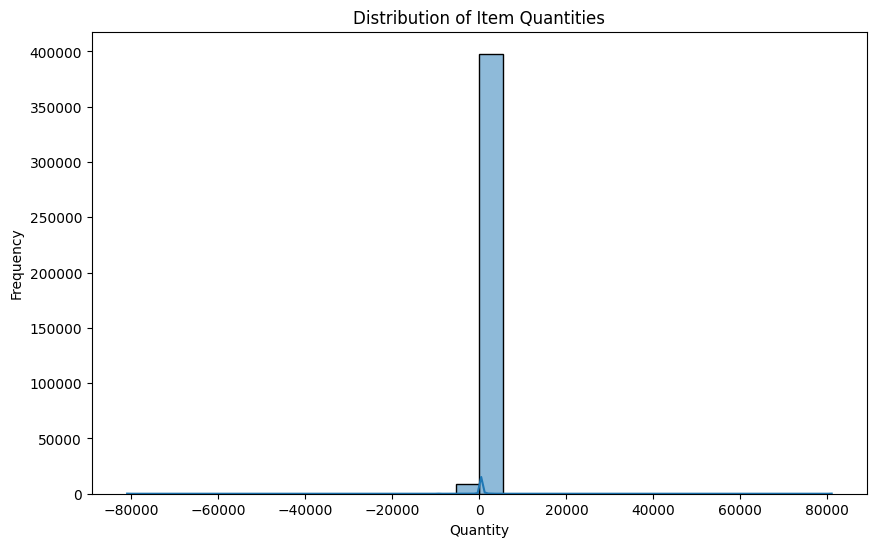

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ecom_df['Quantity'], bins=30, kde=True)
plt.title("Distribution of Item Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


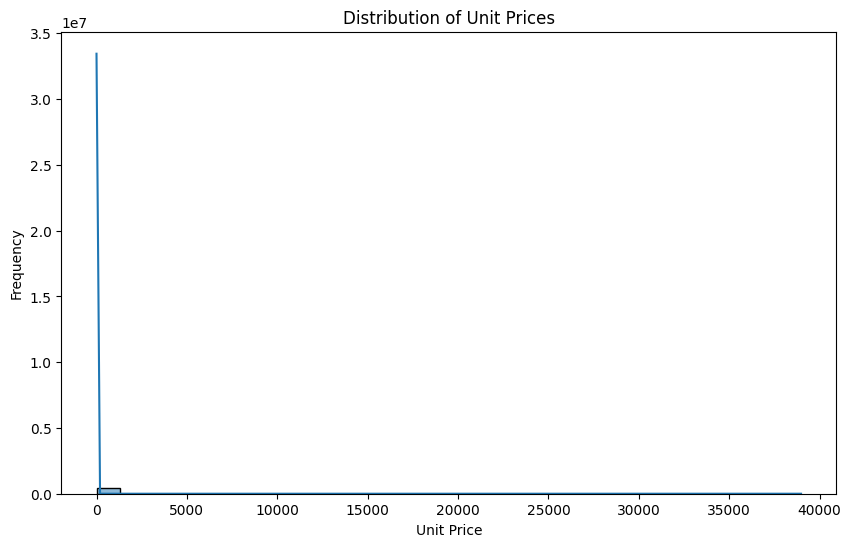

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ecom_df['UnitPrice'], bins=30, kde=True)
plt.title("Distribution of Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


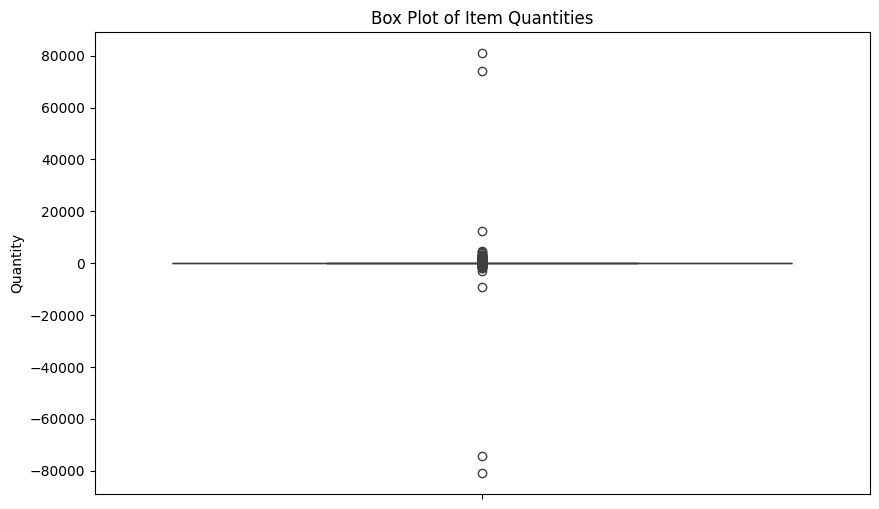

In [ ]:
#Detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=ecom_df['Quantity'])
plt.title("Box Plot of Item Quantities")
plt.show()


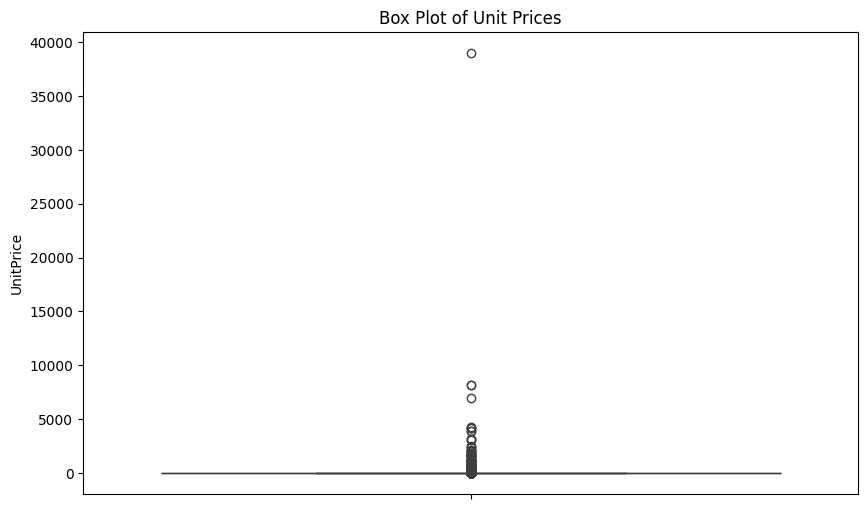

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=ecom_df['UnitPrice'])
plt.title("Box Plot of Unit Prices")
plt.show()


In [ ]:
# Calculate IQR for Quantity
Q1_quantity = ecom_df['Quantity'].quantile(0.25)
Q3_quantity = ecom_df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

# Define outlier thresholds for Quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

# Filter out outliers from Quantity
ecom_df_filtered_quantity = ecom_df[(ecom_df['Quantity'] >= lower_bound_quantity) &
                                     (ecom_df['Quantity'] <= upper_bound_quantity)]

# Calculate IQR for UnitPrice
Q1_unitprice = ecom_df['UnitPrice'].quantile(0.25)
Q3_unitprice = ecom_df['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# Define outlier thresholds for UnitPrice
lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

# Filter out outliers from UnitPrice
ecom_df_filtered_unitprice = ecom_df_filtered_quantity[(ecom_df_filtered_quantity['UnitPrice'] >= lower_bound_unitprice) &
                                                       (ecom_df_filtered_quantity['UnitPrice'] <= upper_bound_unitprice)]


In [ ]:
ecom_df_filtered_unitprice.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,344393.000000,344393,344393.000000,344393.000000
mean,7.279797,2011-07-12 11:59:01.481911552,2.201251,15319.637144
min,-13.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-08 08:20:00,1.250000,13988.000000
50%,5.000000,2011-08-03 11:58:00,1.650000,15235.000000
75%,12.000000,2011-10-23 12:28:00,2.950000,16814.000000
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000
std,6.880816,NaN,1.548459,1711.461068


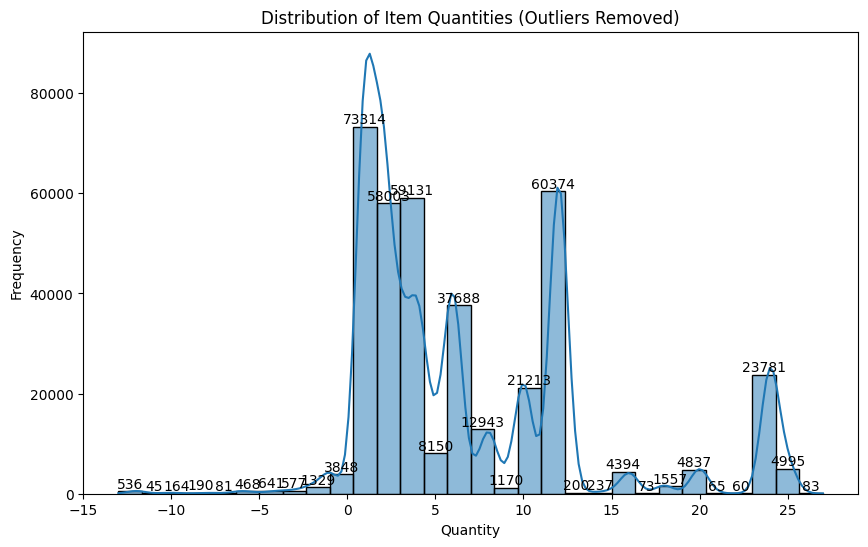

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(ecom_df_filtered_quantity['Quantity'], bins=30, kde=True)

# Add title and labels
plt.title("Distribution of Item Quantities (Outliers Removed)")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

# Add data labels to the bars
for p in hist_plot.patches:  # Iterate over the bars
    height = p.get_height()  # Get the height of each bar
    plt.annotate(f'{int(height)}',  # Format the text
                 (p.get_x() + p.get_width() / 2.0, height),  # Position the label
                 ha='center', va='bottom')  # Horizontal and vertical alignment

plt.show()

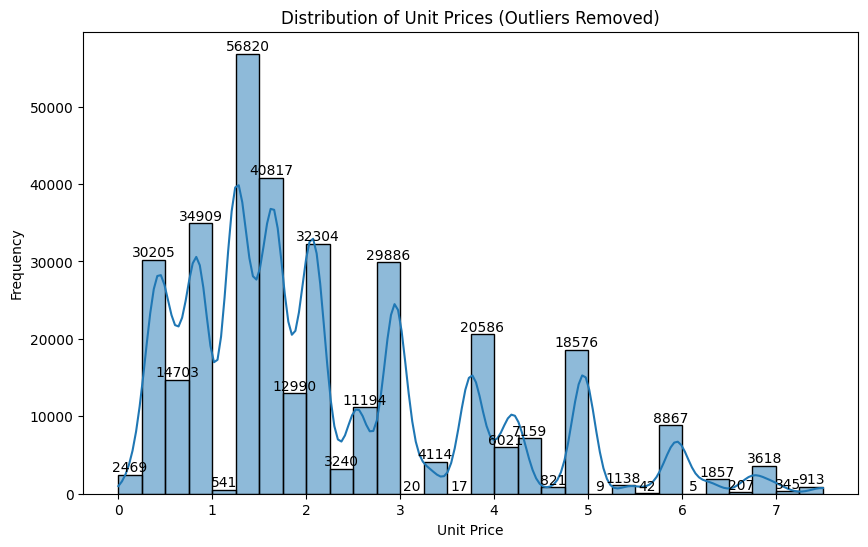

In [ ]:
# Create the histogram for Unit Price
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(ecom_df_filtered_unitprice['UnitPrice'], bins=30, kde=True)

# Add title and labels
plt.title("Distribution of Unit Prices (Outliers Removed)")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")

# Add data labels to the bars
for p in hist_plot.patches:  # Iterate over the bars
    height = p.get_height()  # Get the height of each bar
    plt.annotate(f'{int(height)}',  # Format the text
                 (p.get_x() + p.get_width() / 2.0, height),  # Position the label
                 ha='center', va='bottom')  # Horizontal and vertical alignment

plt.show()

In [ ]:
# Filter for anomalies based on both Quantity and UnitPrice
anomalous_transactions_df = ecom_df[
    (ecom_df['Quantity'] < lower_bound_quantity) |
    (ecom_df['Quantity'] > upper_bound_quantity) |
    (ecom_df['UnitPrice'] < lower_bound_unitprice) |
    (ecom_df['UnitPrice'] > upper_bound_unitprice)
]

# Select relevant columns
anomalous_transactions = anomalous_transactions_df[['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice']]

# Display the resulting table
print(anomalous_transactions)

       InvoiceNo         InvoiceDate  CustomerID  Quantity  UnitPrice
5         536365 2010-12-01 08:26:00     17850.0         2       7.65
9         536367 2010-12-01 08:34:00     13047.0        32       1.69
16        536367 2010-12-01 08:34:00     13047.0         2       9.95
19        536367 2010-12-01 08:34:00     13047.0         4       7.95
20        536367 2010-12-01 08:34:00     13047.0         4       7.95
...          ...                 ...         ...       ...        ...
541865    581583 2011-12-09 12:23:00     13777.0        40       1.45
541866    581583 2011-12-09 12:23:00     13777.0        36       1.85
541867    581584 2011-12-09 12:25:00     13777.0        72       0.72
541868    581584 2011-12-09 12:25:00     13777.0        48       1.85
541892    581586 2011-12-09 12:49:00     13113.0        24       8.95

[62436 rows x 5 columns]


In [ ]:
# Calculate the correlation between Unit Price and Quantity
correlation = ecom_df_filtered_unitprice[['UnitPrice', 'Quantity']].corr().iloc[0, 1]
print(f"Correlation between Unit Price and Quantity: {correlation:.2f}")


Correlation between Unit Price and Quantity: -0.34


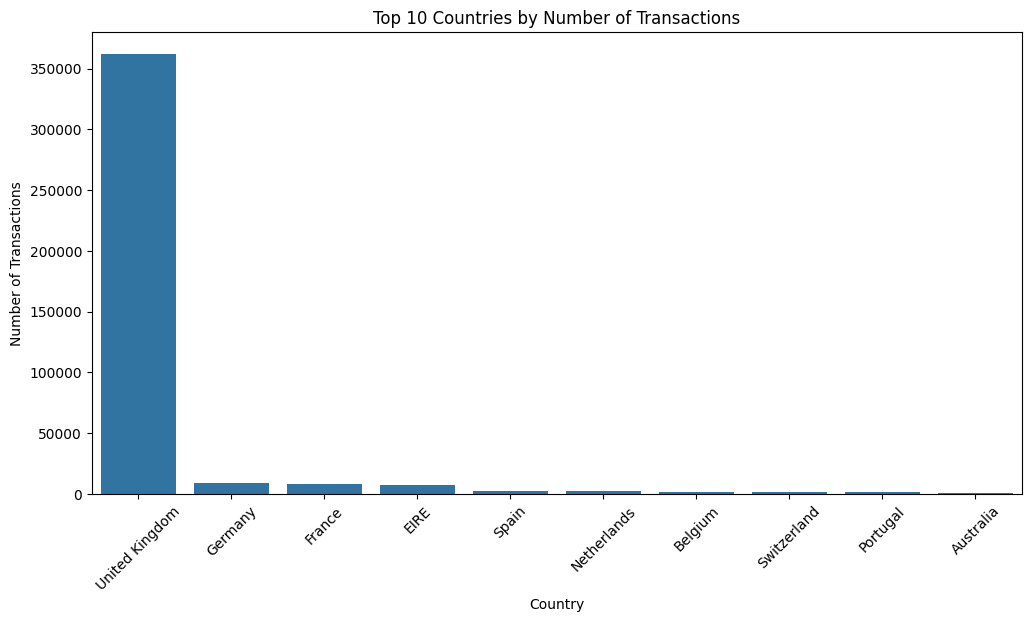

In [ ]:
plt.figure(figsize=(12, 6))
country_counts = ecom_df['Country'].value_counts()
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10])
plt.title("Top 10 Countries by Number of Transactions")
plt.xticks(rotation=45)
plt.ylabel("Number of Transactions")
plt.show()


In [ ]:
# Add the Revenue column to the original DataFrame
ecom_df['Revenue'] = ecom_df['Quantity'] * ecom_df['UnitPrice']

In [ ]:
# Summary statistics for Revenue
print(ecom_df['Revenue'].describe())


count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: Revenue, dtype: float64


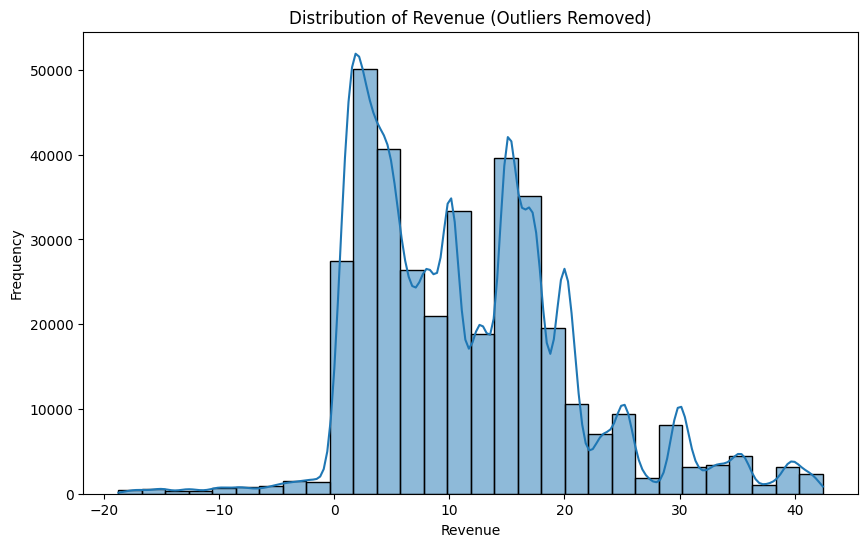

In [ ]:
# Calculate the IQR for Revenue
Q1_revenue = ecom_df['Revenue'].quantile(0.25)
Q3_revenue = ecom_df['Revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
# Define outlier thresholds for Revenue
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue
# Filter out outliers from Revenue
ecom_df_filtered_revenue = ecom_df[(ecom_df['Revenue'] >= lower_bound_revenue) &
                                    (ecom_df['Revenue'] <= upper_bound_revenue)]

# Visualize the distribution of Revenue after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(ecom_df_filtered_revenue['Revenue'], bins=30, kde=True)
plt.title("Distribution of Revenue (Outliers Removed)")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

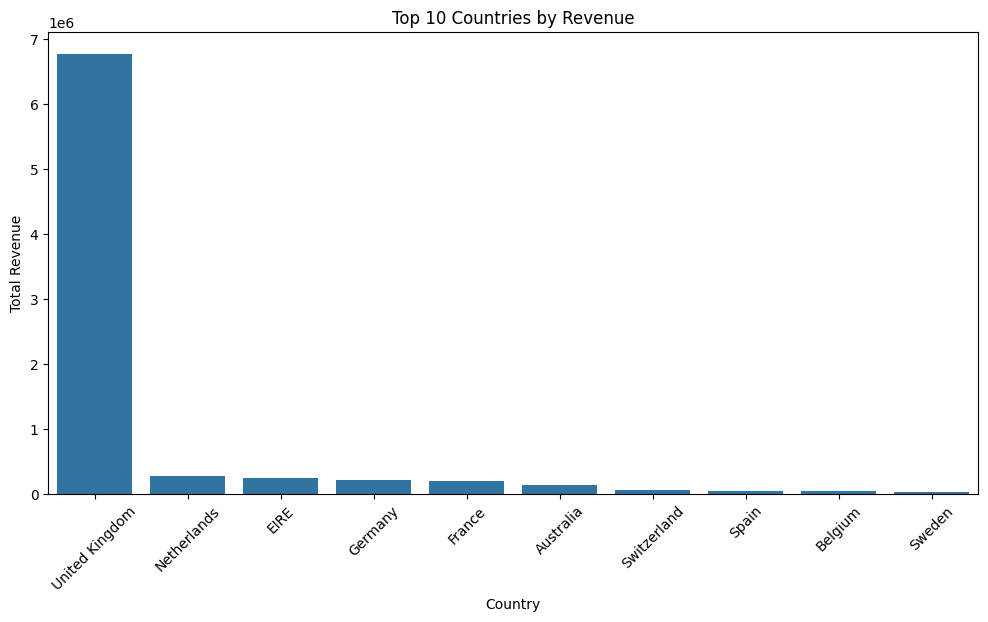

In [ ]:
# Calculate total revenue per country
country_revenue = ecom_df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Create a DataFrame for the top 10 countries by revenue
top_countries_revenue = country_revenue.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_revenue.index, y=top_countries_revenue.values)

plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.xlabel("Country")  # Adding x-label for clarity
plt.show()


## RFM Calculation

### Create a dataframe of unique customers

As RFM is a customer-level metric, a unique customer dataframe is needed to proceed the next steps.

In [ ]:
ecom_customers = pd.DataFrame(ecom_df['CustomerID'].unique())
ecom_customers.columns = ['CustomerID']
ecom_customers.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


### Calculate Customer Recency

In [ ]:
#Calculating the max recency date
ecom_recency = ecom_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

In [ ]:
ecom_recency.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [ ]:
#Renaming columns
ecom_recency.columns = ['CustomerID','recency_date']

In [ ]:
ecom_recency.head()

,CustomerID,recency_date
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [ ]:
ecom_customers=ecom_customers.merge(ecom_recency, on='CustomerID')

Assumption: The analyzing date is '2012-01-01'

Code meaning: Adding a 'recency' column with the value of the timedelta between the analyzing date and the recency_date. Then the result is divided by a timedelta representing one day to convert the time difference into a numerical value representing the recency in days.


In [ ]:
ecom_customers['recency'] = round((pd.to_datetime('2012-01-01') - ecom_customers['recency_date']) / np.timedelta64(1, 'D')).astype(int)

In [ ]:
ecom_customers.head()

,CustomerID,recency_date,recency
0,17850.0,2011-02-10 14:38:00,324
1,13047.0,2011-11-08 12:10:00,53
2,12583.0,2011-12-07 08:07:00,25
3,13748.0,2011-09-05 09:45:00,118
4,15100.0,2011-01-13 17:09:00,352


### Calculate Customer Frequency

In [ ]:
ecom_frequency = ecom_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [ ]:
ecom_frequency.columns = ['CustomerID','frequency']

In [ ]:
ecom_frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
ecom_customers=ecom_customers.merge(ecom_frequency, on='CustomerID')

In [ ]:
ecom_customers.head()

,CustomerID,recency_date,recency,frequency
0,17850.0,2011-02-10 14:38:00,324,35
1,13047.0,2011-11-08 12:10:00,53,18
2,12583.0,2011-12-07 08:07:00,25,18
3,13748.0,2011-09-05 09:45:00,118,5
4,15100.0,2011-01-13 17:09:00,352,6


### Calculate Customer Monetary

In [ ]:
ecom_monetary = ecom_df.groupby('CustomerID')['Revenue'].sum().reset_index()

In [ ]:
#Renaming columns
ecom_monetary.columns = ['CustomerID','monetary']

In [ ]:
ecom_monetary.head()

,CustomerID,monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
ecom_customers=ecom_customers.merge(ecom_monetary, on='CustomerID')

In [ ]:
ecom_customers.head()

,CustomerID,recency_date,recency,frequency,monetary
0,17850.0,2011-02-10 14:38:00,324,35,5288.63
1,13047.0,2011-11-08 12:10:00,53,18,3079.10
2,12583.0,2011-12-07 08:07:00,25,18,7187.34
3,13748.0,2011-09-05 09:45:00,118,5,948.25
4,15100.0,2011-01-13 17:09:00,352,6,635.10


## Examine the statistical distributions

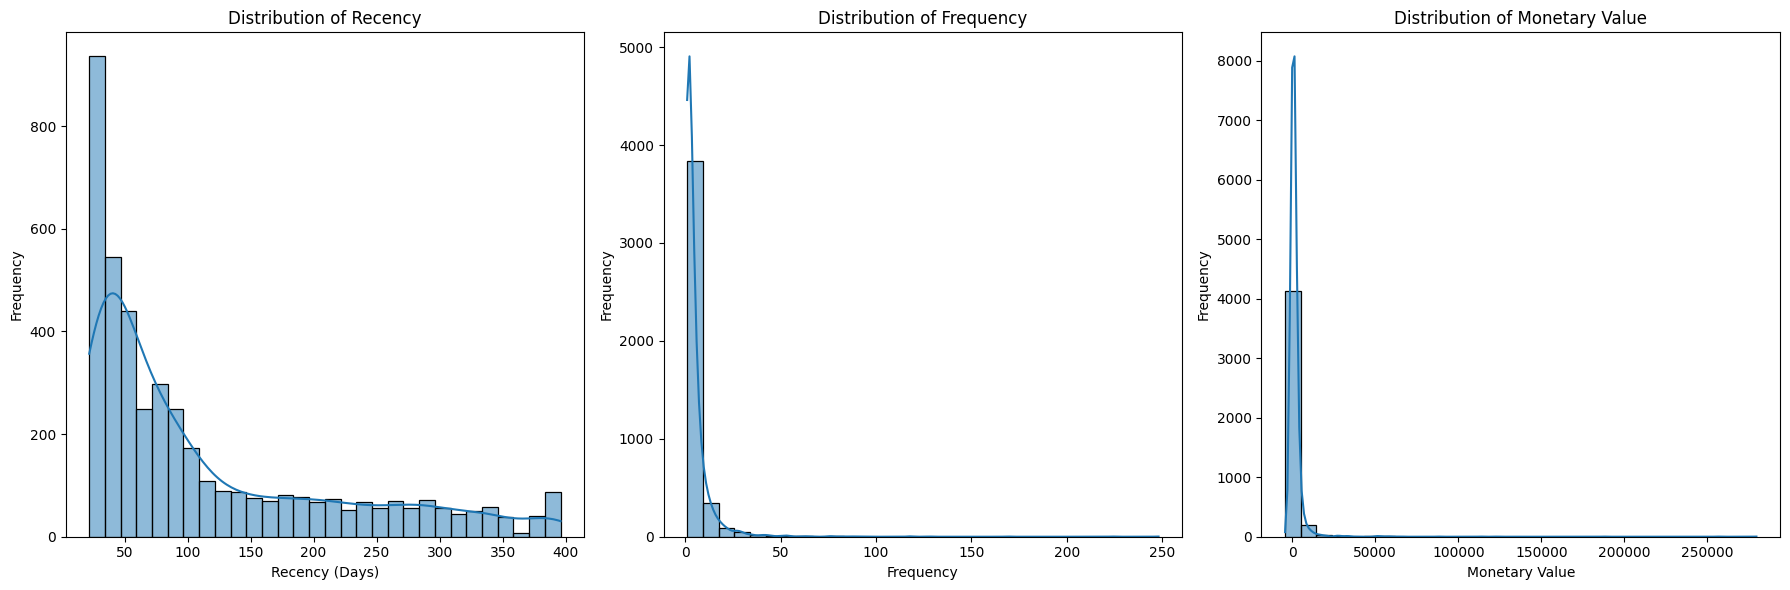

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for recency
sns.histplot(ecom_customers['recency'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Recency")
axes[0].set_xlabel("Recency (Days)")
axes[0].set_ylabel("Frequency")

# Plot for frequency
sns.histplot(ecom_customers['frequency'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Frequency")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Frequency")

# Plot for monetary
sns.histplot(ecom_customers['monetary'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Monetary Value")
axes[2].set_xlabel("Monetary Value")
axes[2].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


Recency comment:
- Seems like there is a significant number of customers engaging with Superstore e-commerce (under 100 days).
- These customers are quite active, indicating that they might be more responsive to Superstore marketing campaigns, indicating the potential targets.
- The values distributed in other bins suggest that Superstore need to re-engage customers with >100 days in recency.

Frequency comment:
- The concentration of density and bars in the 0-50 range suggests that there might be a segment of customers who are more active and engaged with Superstore's e-commerce platform. These customers with higher frequencies may represent a key target segment for the company's marketing efforts and retention strategies.
- For those in the tail of the analysis, we might need to analyze them to understand their behaviors and unique needs as high frequency customers do bring significant values.

Monetary Comment
- This is also a skewed distribution, meaning that only a few customers generate substantial monetary value to Superstore. This indicates a deeper investigation to reveal the high-value customers, who need special treatments.
- This distribution indicates the spending habit of the current customers of Superstore, focusing on small transactions. This insight can help in tailoring the company's marketing and pricing strategies.

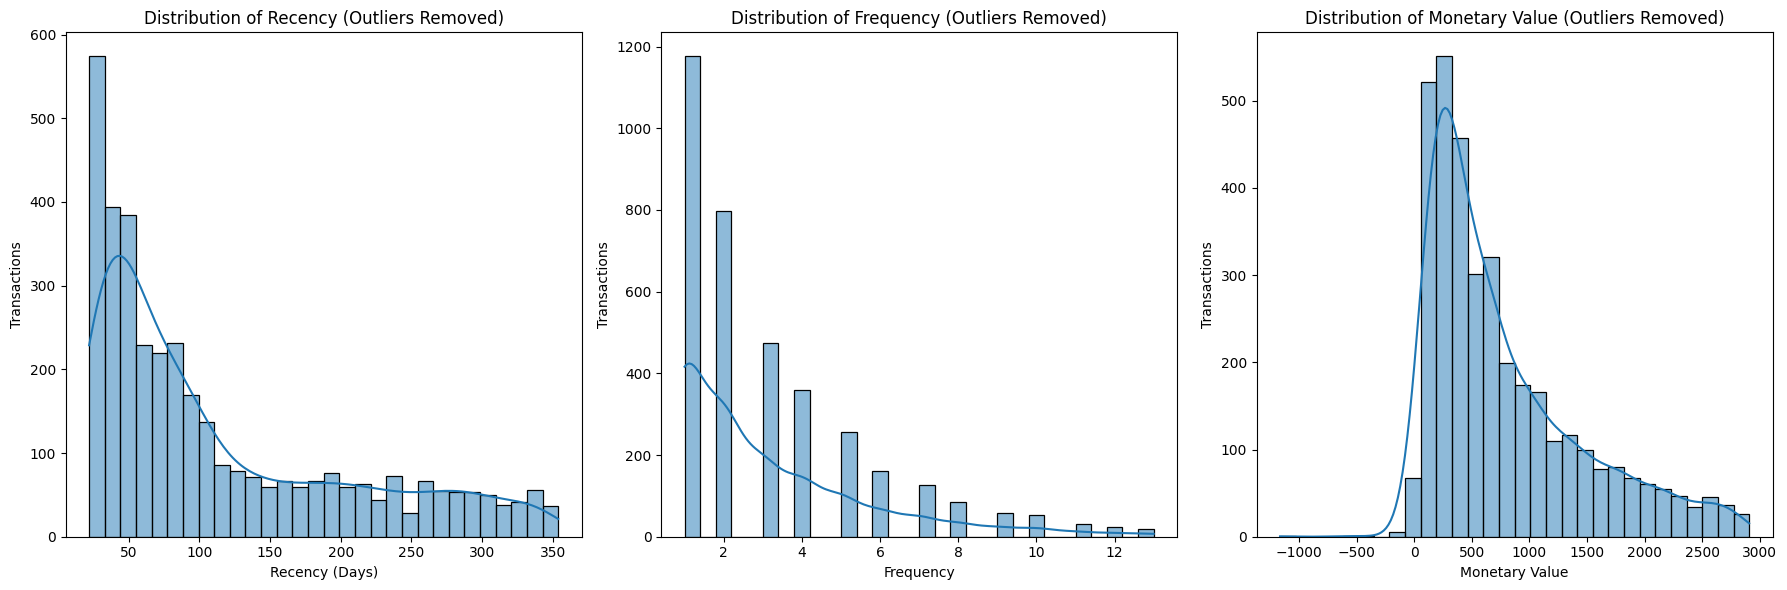

In [ ]:
# Step 1: Define a function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Step 2: Remove outliers from recency, frequency, and monetary values
ecom_customers_cleaned = remove_outliers(ecom_customers, 'recency')
ecom_customers_cleaned = remove_outliers(ecom_customers_cleaned, 'frequency')
ecom_customers_cleaned = remove_outliers(ecom_customers_cleaned, 'monetary')

# Step 3: Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for recency
sns.histplot(ecom_customers_cleaned['recency'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Recency (Outliers Removed)")
axes[0].set_xlabel("Recency (Days)")
axes[0].set_ylabel("Transactions")

# Plot for frequency
sns.histplot(ecom_customers_cleaned['frequency'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Frequency (Outliers Removed)")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Transactions")

# Plot for monetary
sns.histplot(ecom_customers_cleaned['monetary'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Monetary Value (Outliers Removed)")
axes[2].set_xlabel("Monetary Value")
axes[2].set_ylabel("Transactions")

# Adjust layout
plt.tight_layout()
plt.show()

## Calculating RFM scores using quantile-based discretization

### Calculate the R score

Since customers with lower recency are considered more valuable than those with higher recency, the scoring methodology for the "R" category differs from the others. To divide customers into approximately equal groups, I will use the qcut() function on the recency column and assign labels ranging from 5 to 1. This ensures that the highest score (5) is assigned to customers with the lowest recency, indicating their higher value.

In [ ]:
ecom_customers['r'] = pd.qcut(ecom_customers['recency'], q=5, labels=[5, 4, 3, 2, 1])

In [ ]:
ecom_customers.head() #nice

,CustomerID,recency_date,recency,frequency,monetary,r
0,17850.0,2011-02-10 14:38:00,324,35,5288.63,1
1,13047.0,2011-11-08 12:10:00,53,18,3079.10,4
2,12583.0,2011-12-07 08:07:00,25,18,7187.34,5
3,13748.0,2011-09-05 09:45:00,118,5,948.25,2
4,15100.0,2011-01-13 17:09:00,352,6,635.10,1


Checking the R score

In [ ]:
ecom_customers.groupby('r').agg(
    count=('CustomerID', 'count'),
    min_recency=('recency', min),
    max_recency=('recency', max),
    std_recency=('recency', 'std'),
    avg_recency=('recency', 'mean')
).sort_values(by='avg_recency')

<ipython-input-63-5a0a466c9314>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ecom_customers.groupby('r').agg(
<ipython-input-63-5a0a466c9314>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ecom_customers.groupby('r').agg(
<ipython-input-63-5a0a466c9314>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ecom_customers.groupby('r').agg(


,count,min_recency,max_recency,std_recency,avg_recency
r,,,,,
5,884,22,33,3.385869,27.514706
4,865,34,53,5.554072,43.433526
3,889,54,93,11.446716,71.811024
2,860,94,200,32.886698,136.975581
1,874,201,396,57.761832,291.183066


### Calculating the F score

While calculating the F score, I discovered that data skewness presents a significant challenge due to overlapping bin edges, resulting in ambiguity when assigning data points.

Explanation:

- Quantile-based discretization - qcut() - divides the dataset into bins based on percentiles of the overall data distribution, without considering the specific distribution or pattern within the data, such as the skewed distribution of order volumes. This can result in closer bin edges in regions with more concentrated data points, leading to overlapping bins. As a consequence, some data points may fall into multiple bins simultaneously, causing ambiguity in their assignment.

- For instance, let's say the first bin edge is at 50, and the second bin edge is at 100. If we have two order volumes, 55 and 60, they are relatively close to each other. However, due to the overlapping bin edges, one of these values may be assigned to the lower bin, while the other falls into the higher bin, causing ambiguity and potential misclassification.

Solution: Using .rank(method = 'first')

This method assigns a unique position or rank to each value based on their order within the data. This guarantees that each value is distinct and eliminates the possibility of overlapping bin edges.

In [ ]:
ecom_customers['f'] = pd.qcut(ecom_customers['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

In [ ]:
ecom_customers.head()

,CustomerID,recency_date,recency,frequency,monetary,r,f
0,17850.0,2011-02-10 14:38:00,324,35,5288.63,1,5
1,13047.0,2011-11-08 12:10:00,53,18,3079.10,4,5
2,12583.0,2011-12-07 08:07:00,25,18,7187.34,5,5
3,13748.0,2011-09-05 09:45:00,118,5,948.25,2,4
4,15100.0,2011-01-13 17:09:00,352,6,635.10,1,4


To combat the skewness of this dataset, I will analyze the normal distribution and abnormal transactions separately.

In [ ]:
ecom_customers.groupby('f').agg(
    count=('CustomerID', 'count'),
    min_frequency=('frequency', min),
    max_frequency=('frequency', max),
    std_frequency=('frequency', 'std'),
    avg_frequency=('frequency', 'mean')
).sort_values(by='avg_frequency')

<ipython-input-66-d2b9dcc71009>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ecom_customers.groupby('f').agg(
<ipython-input-66-d2b9dcc71009>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ecom_customers.groupby('f').agg(
<ipython-input-66-d2b9dcc71009>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ecom_customers.groupby('f').agg(


,count,min_frequency,max_frequency,std_frequency,avg_frequency
f,,,,,
1,875,1,1,0.000000,1.000000
2,874,1,2,0.500285,1.498856
3,874,2,4,0.502590,2.567506
4,874,4,7,0.835640,4.832952
5,875,7,248,17.058856,15.470857


### Calculating the M score

Moving forward, the scale will range from 1 to 5, with 5 representing the highest value generated.

In [ ]:
ecom_customers['m'] = pd.qcut(ecom_customers['monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

In [ ]:
ecom_customers.groupby('m').agg(
    count=('CustomerID', 'count'),
    min_monetary=('monetary', min),
    max_monetary=('monetary', max),
    std_monetary=('monetary', 'std'),
    avg_monetary=('monetary', 'mean')
).sort_values(by='avg_monetary')

<ipython-input-68-1a76f1f3f4e8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ecom_customers.groupby('m').agg(
<ipython-input-68-1a76f1f3f4e8>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ecom_customers.groupby('m').agg(
<ipython-input-68-1a76f1f3f4e8>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ecom_customers.groupby('m').agg(


,count,min_monetary,max_monetary,std_monetary,avg_monetary
m,,,,,
1,875,-4287.63,234.34,195.473798,122.839074
2,874,234.60,465.32,63.180118,342.870791
3,874,465.55,908.99,121.016302,661.537497
4,874,909.23,2000.86,310.061196,1356.261945
5,875,2002.40,279489.02,17441.502306,7004.978104


A score of 5 indicates a significant gap between the minimum and maximum monetary values, as supported by a high standard deviation. This suggests that individuals who score a 5 can generate monetary values ranging from 2,000 to over 300,000.

Therefore, it is important to further examine those who scored 5 in the monetary category (M).

### Creating the RFM segment column

In [ ]:
ecom_customers['rfm_value'] = ecom_customers['r'].astype(str) +\
                      ecom_customers['f'].astype(str) +\
                      ecom_customers['m'].astype(str)

In [ ]:
ecom_customers.head()

,CustomerID,recency_date,recency,frequency,monetary,r,f,m,rfm_value
0,17850.0,2011-02-10 14:38:00,324,35,5288.63,1,5,5,155
1,13047.0,2011-11-08 12:10:00,53,18,3079.10,4,5,5,455
2,12583.0,2011-12-07 08:07:00,25,18,7187.34,5,5,5,555
3,13748.0,2011-09-05 09:45:00,118,5,948.25,2,4,4,244
4,15100.0,2011-01-13 17:09:00,352,6,635.10,1,4,3,143


### Creating the RFM score column

In order to quickly sort and rank the customers, a RFM score is needed, which can also give us a better overall asessment and comparison.

In [ ]:
ecom_customers['rfm_score'] = ecom_customers['r'].astype(int) +\
                      ecom_customers['f'].astype(int) +\
                      ecom_customers['m'].astype(int)

In [ ]:
ecom_customers.head()

,CustomerID,recency_date,recency,frequency,monetary,r,f,m,rfm_value,rfm_score
0,17850.0,2011-02-10 14:38:00,324,35,5288.63,1,5,5,155,11
1,13047.0,2011-11-08 12:10:00,53,18,3079.10,4,5,5,455,14
2,12583.0,2011-12-07 08:07:00,25,18,7187.34,5,5,5,555,15
3,13748.0,2011-09-05 09:45:00,118,5,948.25,2,4,4,244,10
4,15100.0,2011-01-13 17:09:00,352,6,635.10,1,4,3,143,8


In [ ]:
rfm_score_df=ecom_customers.groupby('rfm_score').agg(
    customers=('CustomerID', 'count'),
    mean_recency=('recency', 'mean'),
    mean_frequency=('frequency', 'mean'),
    mean_monetary=('monetary', 'mean'),
).sort_values(by='rfm_score')
print(rfm_score_df)

           customers  mean_recency  mean_frequency  mean_monetary
rfm_score                                                        
3                311    308.443730        1.000000     119.287138
4                350    239.991429        1.154286     206.952829
5                253    217.260870        1.426877     362.030281
6                327    150.171254        1.559633     387.071988
7                384    110.601562        1.776042     430.090521
8                411     98.673966        2.189781     565.181462
9                378     85.208995        2.756614     761.305558
10               335     75.047761        3.495522    1043.426899
11               335     66.328358        4.614925    1365.888836
12               339     53.091445        5.566372    1725.539145
13               302     43.556291        7.652318    2664.558841
14               299     36.568562       11.270903    4240.623077
15               348     26.862069       22.112069   10983.989569


This figure provides us with a more comprehensive understanding of Superstore's customers. By examining the customers with the lowest rfm_score of 3, we observe that they have an average recency of 307 days, place a single order, and generate approximately 139 dollars in revenue. In contrast, the highest scorers in rfm_score indicate that they engaged with Superstore less than a month ago, made more than 22 orders, and generated over 11,000 dollars in revenue.

On top of that, the table allows Superstore's marketers to see who to target with reactivation campaigns or who should be given special treatment to have them continue being the champions.

In [ ]:
rfm_score_df = rfm_score_df.reset_index()

## Joining data

In [ ]:
seg_df.columns = ['segment','rfm_value']

In [ ]:
seg_df.head()

,segment,rfm_value
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [ ]:
seg_df['rfm_value'] = seg_df['rfm_value'].str.split(',') #convert comma-separated string to a list of rfm scores

In [ ]:
seg_df = seg_df.explode('rfm_value').reset_index(drop=True)  # Explode the list-like column into rows

In [ ]:
seg_df.head()

,segment,rfm_value
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [ ]:
seg_df['rfm_value'] = seg_df['rfm_value'].astype(str)

In [ ]:
seg_df['rfm_value'].dtype

dtype('O')

In [ ]:
seg_df['rfm_value'] = seg_df['rfm_value'].str.strip()

In [ ]:
seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   segment    125 non-null    object
 1   rfm_value  125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [ ]:
customer_rfm_df = ecom_customers.merge(seg_df, on='rfm_value', how='left')

In [ ]:
customer_rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    4372 non-null   float64       
 1   recency_date  4372 non-null   datetime64[ns]
 2   recency       4372 non-null   int64         
 3   frequency     4372 non-null   int64         
 4   monetary      4372 non-null   float64       
 5   r             4372 non-null   category      
 6   f             4372 non-null   category      
 7   m             4372 non-null   category      
 8   rfm_value     4372 non-null   object        
 9   rfm_score     4372 non-null   int64         
 10  segment       4372 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 286.8+ KB


In [ ]:
customer_rfm_df.head()

,CustomerID,recency_date,recency,frequency,monetary,r,f,m,rfm_value,rfm_score,segment
0,17850.0,2011-02-10 14:38:00,324,35,5288.63,1,5,5,155,11,Cannot Lose Them
1,13047.0,2011-11-08 12:10:00,53,18,3079.10,4,5,5,455,14,Champions
2,12583.0,2011-12-07 08:07:00,25,18,7187.34,5,5,5,555,15,Champions
3,13748.0,2011-09-05 09:45:00,118,5,948.25,2,4,4,244,10,At Risk
4,15100.0,2011-01-13 17:09:00,352,6,635.10,1,4,3,143,8,At Risk


# RFM Visualization

### A big picture of Superstore's customers - Tree map

In [ ]:
pip install squarify

In [ ]:
import squarify

In [ ]:
customer_rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    4372 non-null   float64       
 1   recency_date  4372 non-null   datetime64[ns]
 2   recency       4372 non-null   int64         
 3   frequency     4372 non-null   int64         
 4   monetary      4372 non-null   float64       
 5   r             4372 non-null   category      
 6   f             4372 non-null   category      
 7   m             4372 non-null   category      
 8   rfm_value     4372 non-null   object        
 9   rfm_score     4372 non-null   int64         
 10  segment       4372 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 286.8+ KB


In [ ]:
colors = sns.color_palette('Set3', n_colors=11)

In [ ]:
segment_counts = customer_rfm_df['segment'].value_counts()

In [ ]:
segment_counts

,count
segment,
Champions,860
Hibernating customers,742
Lost customers,544
Potential Loyalist,491
Loyal,434
At Risk,388
Need Attention,284
About To Sleep,259
New Customers,159


In [ ]:
full_df = pd.merge(customer_rfm_df, ecom_df, on='CustomerID')

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CustomerID    406829 non-null  float64       
 1   recency_date  406829 non-null  datetime64[ns]
 2   recency       406829 non-null  int64         
 3   frequency     406829 non-null  int64         
 4   monetary      406829 non-null  float64       
 5   r             406829 non-null  category      
 6   f             406829 non-null  category      
 7   m             406829 non-null  category      
 8   rfm_value     406829 non-null  object        
 9   rfm_score     406829 non-null  int64         
 10  segment       406829 non-null  object        
 11  InvoiceNo     406829 non-null  object        
 12  StockCode     406829 non-null  object        
 13  Description   406829 non-null  object        
 14  Quantity      406829 non-null  int64         
 15  InvoiceDate   406

In [ ]:
segment_total_sales = full_df.groupby('segment')['Revenue'].sum()

<class 'pandas.core.series.Series'>
segment
Champions                860
Hibernating customers    742
Lost customers           544
Potential Loyalist       491
Loyal                    434
At Risk                  388
Need Attention           284
About To Sleep           259
New Customers            159
Cannot Lose Them         120
Promising                 91
Name: count, dtype: int64
(11,)


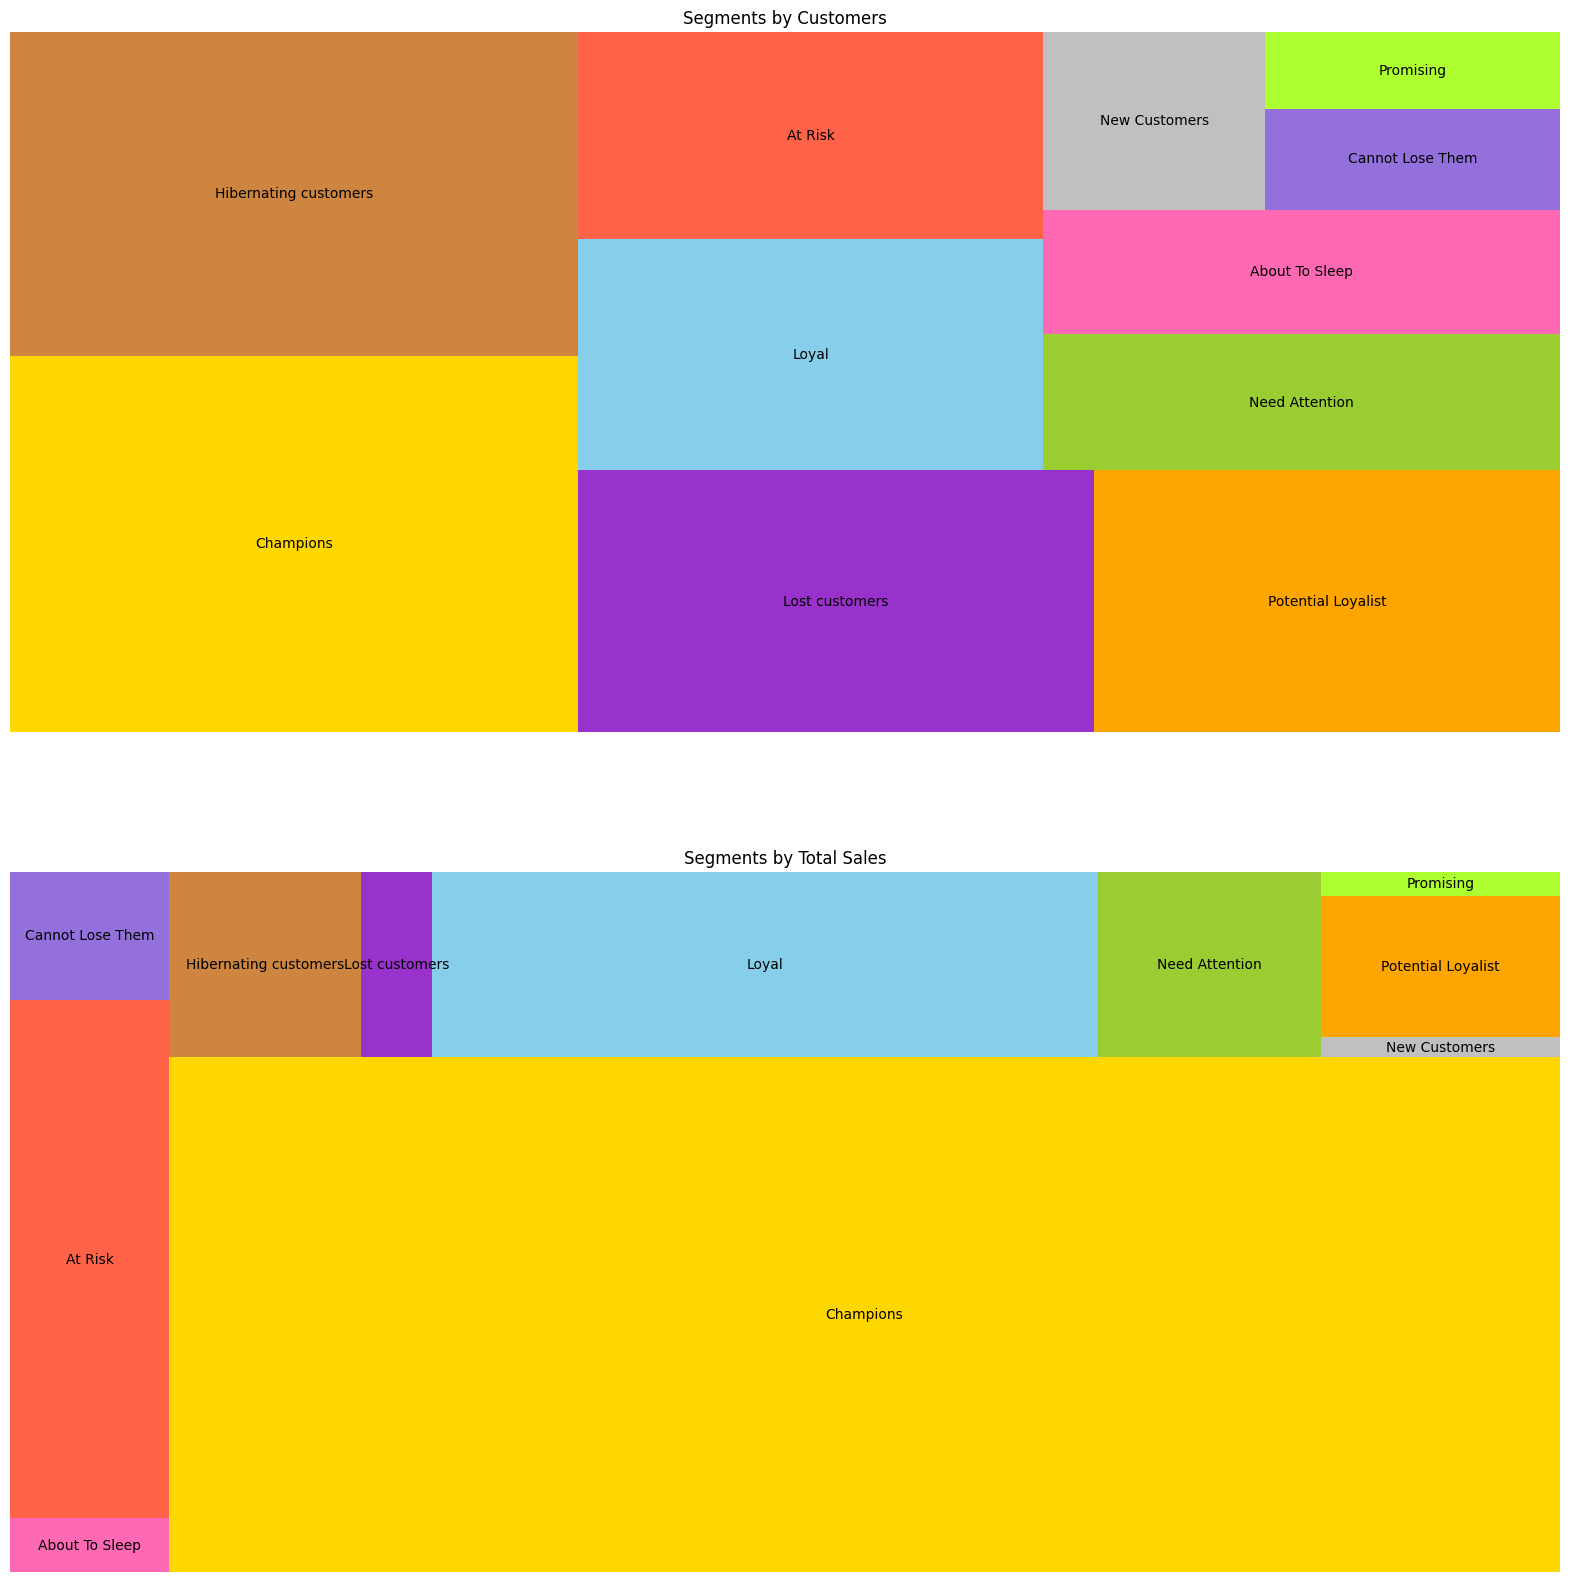

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Define your colors here
segment_colors = {
    'Champions': '#FFD700',
    'Hibernating customers': '#CD853F',
    'Need Attention': '#9ACD32',
    'About To Sleep': '#FF69B4',
    'Cannot Lose Them': '#9370DB',
    'Promising': '#ADFF2F',
    'New Customers': '#C0C0C0',
    'Loyal': '#87CEEB',
    'At Risk': '#FF6347',
    'Potential Loyalist': '#FFA500',
    'Lost customers': '#9932CC',
}

# Check the contents of segment_counts
print(type(segment_counts))
print(segment_counts)
print(segment_counts.shape)

# Select proper structure if needed
if isinstance(segment_counts, pd.DataFrame):
    # Select a specific numerical column
    segment_counts = customer_rfm_df['segment'].value_counts()

elif isinstance(segment_counts, np.ndarray) and segment_counts.ndim > 1:
    segment_counts = segment_counts.ravel()  # Flatten if it's multi-dimensional

# After adjustments ensure segment_counts is a Series
if not isinstance(segment_counts, pd.Series):
    segment_counts = pd.Series(segment_counts)  # Convert to Series if needed

# Ensure numeric
segment_counts = pd.to_numeric(segment_counts, errors='coerce').dropna()

# Now proceed to plotting
fig = plt.figure(figsize=(20, 20))

# Create the first subplot for segments by customers
ax1 = fig.add_subplot(211)
squarify.plot(
    sizes=segment_counts,
    label=segment_counts.index,
    color=[segment_colors.get(x, 'gray') for x in segment_counts.index],
    ax=ax1
)
ax1.set_title('Segments by Customers')
ax1.axis('off')

# Create the second subplot for total sales
ax2 = fig.add_subplot(212)
squarify.plot(
    sizes=segment_total_sales,
    label=segment_total_sales.index,
    color=[segment_colors.get(x, 'gray') for x in segment_total_sales.index],
    ax=ax2
)
ax2.set_title('Segments by Total Sales')
ax2.axis('off')

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.2)

# Show the plots
plt.show()


### How our segments are doing - Bar & Column charts

#### Column

In [ ]:
customer_rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    4372 non-null   float64       
 1   recency_date  4372 non-null   datetime64[ns]
 2   recency       4372 non-null   int64         
 3   frequency     4372 non-null   int64         
 4   monetary      4372 non-null   float64       
 5   r             4372 non-null   category      
 6   f             4372 non-null   category      
 7   m             4372 non-null   category      
 8   rfm_value     4372 non-null   object        
 9   rfm_score     4372 non-null   int64         
 10  segment       4372 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 286.8+ KB


In [ ]:
subset_df = customer_rfm_df[['CustomerID','rfm_score', 'segment']]
subset_df = subset_df.drop_duplicates().sort_values(by=['rfm_score', 'segment']).reset_index(drop=True)

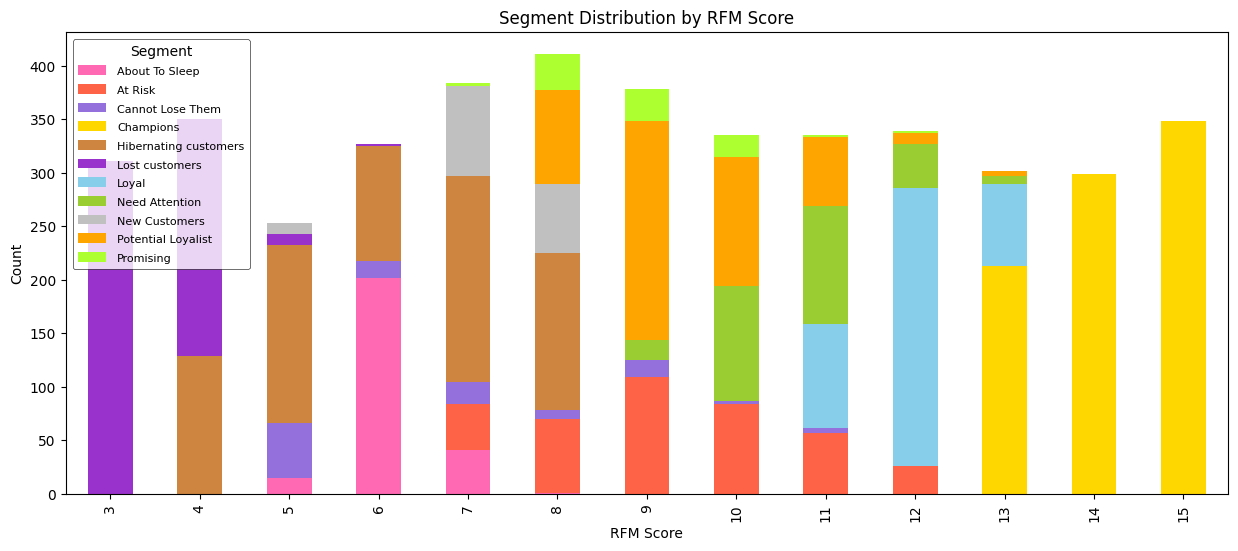

In [ ]:
# Define the segment colors dictionary
segment_colors = {
    'Champions': '#FFD700',  # Yellow
    'Hibernating customers': '#CD853F',  # Brown
    'Need Attention': '#9ACD32',  # Green
    'About To Sleep': '#FF69B4',  # Pink
    'Cannot Lose Them': '#9370DB',  # Purple
    'Promising': '#ADFF2F',  # Lime
    'New Customers': '#C0C0C0',  # Gray
    'Loyal': '#87CEEB',  # Blue
    'At Risk': '#FF6347',  # Red
    'Potential Loyalist': '#FFA500',  # Orange
    'Lost customers': '#9932CC',  # Dark Purple
}

# Count the occurrences of each segment for each rfm_score
segment_counts = subset_df.groupby(['rfm_score', 'segment']).size().unstack().fillna(0)

# Plot the bar plot with custom colors
ax = segment_counts.plot(kind='bar', stacked=True, figsize=(15, 6), color=[segment_colors.get(seg, 'gray') for seg in segment_counts.columns])

plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.title('Segment Distribution by RFM Score')

# Customize the legend
legend = plt.legend(title='Segment', loc='upper left')
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_edgecolor('black')

# Adjust the font size of the legend
for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()

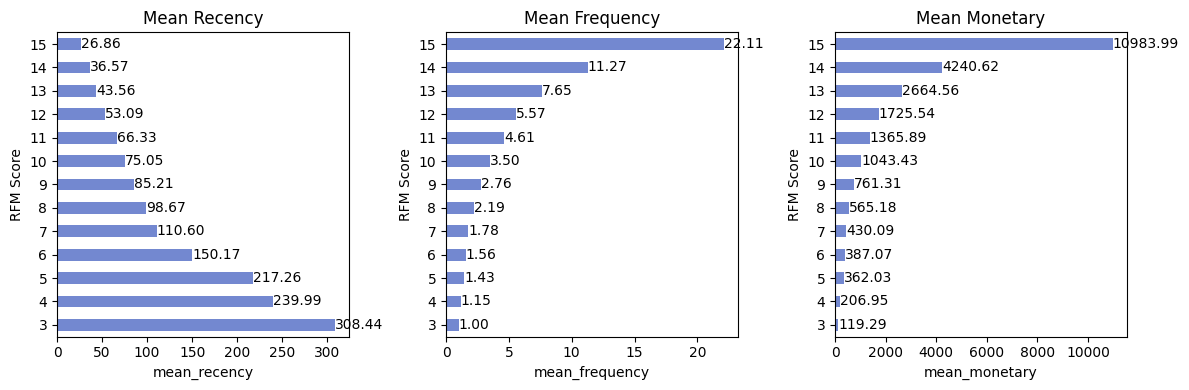

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

metrics = ['mean_recency', 'mean_frequency', 'mean_monetary']
titles = ['Mean Recency', 'Mean Frequency', 'Mean Monetary']

for i, metric in enumerate(metrics):
    ax = axes[i]

    # Create the horizontal bar plot
    rfm_score_df.plot(kind='barh', x='rfm_score', y=metric, ax=ax, color='#7388D0', legend=False)  # Set the color to blue

    ax.set_xlabel(metric)
    ax.set_ylabel('RFM Score')
    ax.set_title(titles[i])

    # Add data labels
    for index, value in enumerate(rfm_score_df[metric]):
        ax.text(value, index, f'{value:.2f}', va='center')  # Format value with 2 decimal places

plt.tight_layout()
plt.show()


#### Bar chart - How our customers are spending this year?

In [ ]:
import matplotlib.ticker as mticker

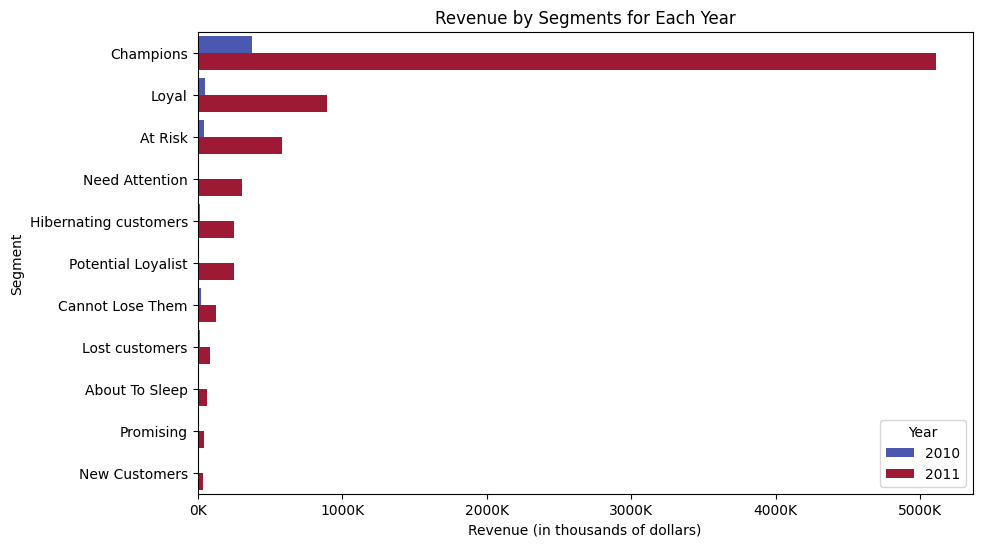

In [ ]:
# Extract the year from the InvoiceDate column
full_df['year'] = full_df['InvoiceDate'].dt.year

# Aggregate revenue by segment and year
segment_year_revenue = full_df.groupby(['segment', 'year'])['Revenue'].sum().reset_index()

# Calculate the total revenue per segment
segment_revenue = segment_year_revenue.groupby('segment')['Revenue'].sum().reset_index()

# Sort the DataFrame by total revenue in descending order
segment_revenue = segment_revenue.sort_values('Revenue', ascending=False)

# Reorder the segments based on the sorted order
segment_year_revenue['segment'] = pd.Categorical(segment_year_revenue['segment'], categories=segment_revenue['segment'], ordered=True)

# Create the subplot grid
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar plot
sns.barplot(data=segment_year_revenue, y='segment', x='Revenue', hue='year', palette='coolwarm', ax=ax)
plt.xlabel('Revenue (in thousands of dollars)')
plt.ylabel('Segment')
plt.title('Revenue by Segments for Each Year')
plt.legend(title='Year', loc='lower right')

# Format x-axis ticks to display in thousands of dollars
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

plt.show()

#### Insights on how our customers are performing in terms of each type of score

In [ ]:
r_score_df = full_df.groupby('r').agg(
    customers=('CustomerID', 'count'),
    min_recency=('recency', min),
    max_recency=('recency', max),
    std_recency=('recency', 'std'),
    avg_recency=('recency', 'mean')
).sort_values(by='avg_recency')

<ipython-input-105-e67304bd6cff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r_score_df = full_df.groupby('r').agg(
<ipython-input-105-e67304bd6cff>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  r_score_df = full_df.groupby('r').agg(
<ipython-input-105-e67304bd6cff>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  r_score_df = full_df.groupby('r').agg(


In [ ]:
r_score_df

,customers,min_recency,max_recency,std_recency,avg_recency
r,,,,,
5,183915,22,33,3.369699,26.308295
4,96432,34,53,5.696866,42.593724
3,63757,54,93,11.564536,69.553994
2,40420,94,200,32.469527,134.607768
1,22305,201,396,57.049136,282.819099


In [ ]:
f_score_df = full_df.groupby('f').agg(
    customers=('CustomerID', 'count'),
    min_frequency=('frequency', min),
    max_frequency=('frequency', max),
    std_frequency=('frequency', 'std'),
    avg_frequency=('frequency', 'mean')
).sort_values(by='avg_frequency')

<ipython-input-106-12de0e94c9ed>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_score_df = full_df.groupby('f').agg(
<ipython-input-106-12de0e94c9ed>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  f_score_df = full_df.groupby('f').agg(
<ipython-input-106-12de0e94c9ed>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  f_score_df = full_df.groupby('f').agg(


In [ ]:
m_score_df = full_df.groupby('m').agg(
    customers=('CustomerID', 'count'),
    min_monetary=('monetary', min),
    max_monetary=('monetary', max),
    std_monetary=('monetary', 'std'),
    avg_monetary=('monetary', 'mean')
).sort_values(by='avg_monetary')

<ipython-input-107-17ce8d934ed2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m_score_df = full_df.groupby('m').agg(
<ipython-input-107-17ce8d934ed2>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  m_score_df = full_df.groupby('m').agg(
<ipython-input-107-17ce8d934ed2>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  m_score_df = full_df.groupby('m').agg(


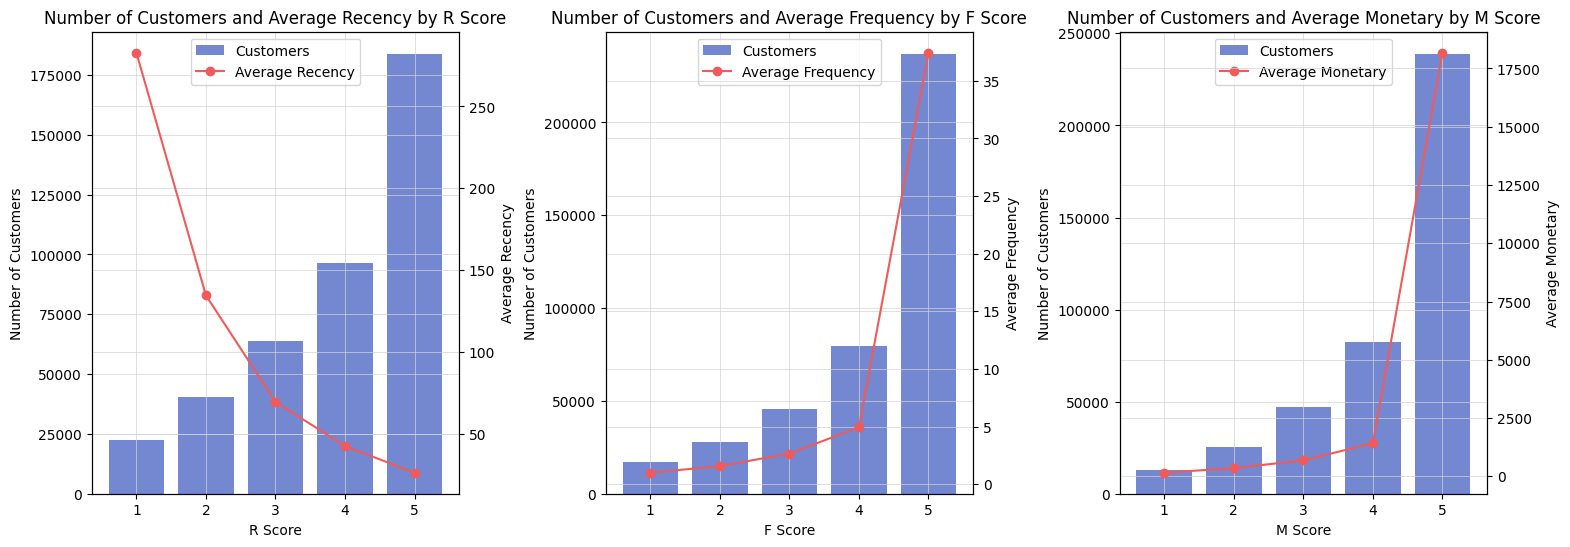

In [ ]:
# Define custom colors
bar_color = '#7388D0'  # Blue
line_color = '#F15A5A'  # Red
range_color = '#F9DC5C'  # Yellow for range plot

# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

# Plot the bar chart and line graph for recency
ax1.bar(r_score_df.index, r_score_df['customers'], color=bar_color, label='Customers')
ax1.set_xlabel('R Score')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Number of Customers and Average Recency by R Score')
ax1.grid(linestyle='-', linewidth='0.5', color='lightgray')

ax1_twin = ax1.twinx()
ax1_twin.plot(r_score_df.index, r_score_df['avg_recency'], color=line_color, marker='o', linestyle='-', label='Average Recency')
ax1_twin.set_ylabel('Average Recency')
ax1_twin.grid(linestyle='-', linewidth='0.5', color='lightgray')

# Plot the bar chart and line graph for frequency
ax2.bar(f_score_df.index, f_score_df['customers'], color=bar_color, label='Customers')
ax2.set_xlabel('F Score')
ax2.set_ylabel('Number of Customers')
ax2.set_title('Number of Customers and Average Frequency by F Score')
ax2.grid(linestyle='-', linewidth='0.5', color='lightgray')

ax2_twin = ax2.twinx()
ax2_twin.plot(f_score_df.index, f_score_df['avg_frequency'], color=line_color, marker='o', linestyle='-', label='Average Frequency')
ax2_twin.set_ylabel('Average Frequency')
ax2_twin.grid(linestyle='-', linewidth='0.5', color='lightgray')

# Plot the bar chart and line graph for monetary
ax3.bar(m_score_df.index, m_score_df['customers'], color=bar_color, label='Customers')
ax3.set_xlabel('M Score')
ax3.set_ylabel('Number of Customers')
ax3.set_title('Number of Customers and Average Monetary by M Score')
ax3.grid(linestyle='-', linewidth='0.5', color='lightgray')

ax3_twin = ax3.twinx()
ax3_twin.plot(m_score_df.index, m_score_df['avg_monetary'], color=line_color, marker='o', linestyle='-', label='Average Monetary')
ax3_twin.set_ylabel('Average Monetary')
ax3_twin.grid(linestyle='-', linewidth='0.5', color='lightgray')

# Combine legends and set position to the top middle for each subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines1_twin, labels1_twin = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines1_twin, labels1 + labels1_twin, loc='upper center')

lines2, labels2 = ax2.get_legend_handles_labels()
lines2_twin, labels2_twin = ax2_twin.get_legend_handles_labels()
ax2.legend(lines2 + lines2_twin, labels2 + labels2_twin, loc='upper center')

lines3, labels3 = ax3.get_legend_handles_labels()
lines3_twin, labels3_twin = ax3_twin.get_legend_handles_labels()
ax3.legend(lines3 + lines3_twin, labels3 + labels3_twin, loc='upper center')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the subplots
plt.show()

## Insight and Recommendation

### Segment - Overview

Time context: 2010-2012

### To a retail business, R and F are considered more impactful
In a retail business like Superstore, a customer who searches and purchases products every month will have a higher recency and frequency score than monetary score. Accordingly, the RFM score could be calculated by giving more weight to R and F scores than M.

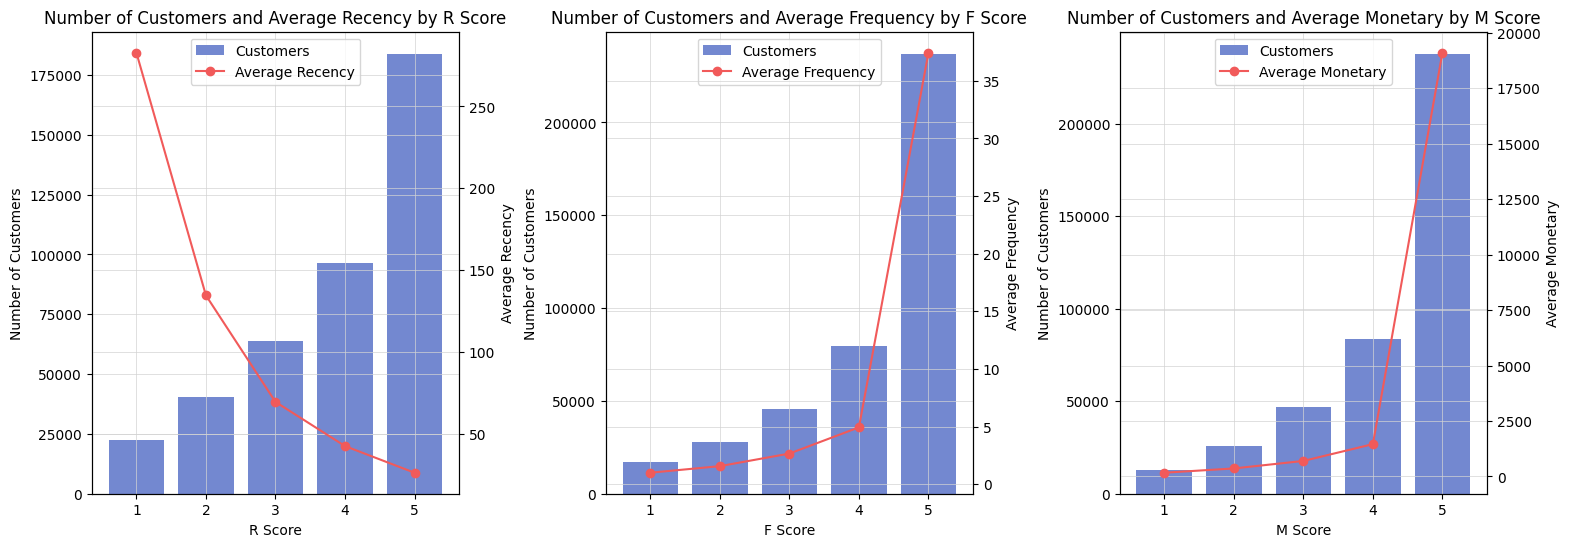

In [ ]:
# Define custom colors
bar_color = '#7388D0'  # Blue
line_color = '#F15A5A'  # Red
range_color = '#F9DC5C'  # Yellow for range plot

# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

# Plot the bar chart and line graph for recency
ax1.bar(r_score_df.index, r_score_df['customers'], color=bar_color, label='Customers')
ax1.set_xlabel('R Score')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Number of Customers and Average Recency by R Score')
ax1.grid(linestyle='-', linewidth='0.5', color='lightgray')

ax1_twin = ax1.twinx()
ax1_twin.plot(r_score_df.index, r_score_df['avg_recency'], color=line_color, marker='o', linestyle='-', label='Average Recency')
ax1_twin.set_ylabel('Average Recency')
ax1_twin.grid(linestyle='-', linewidth='0.5', color='lightgray')

# Plot the bar chart and line graph for frequency
ax2.bar(f_score_df.index, f_score_df['customers'], color=bar_color, label='Customers')
ax2.set_xlabel('F Score')
ax2.set_ylabel('Number of Customers')
ax2.set_title('Number of Customers and Average Frequency by F Score')
ax2.grid(linestyle='-', linewidth='0.5', color='lightgray')

ax2_twin = ax2.twinx()
ax2_twin.plot(f_score_df.index, f_score_df['avg_frequency'], color=line_color, marker='o', linestyle='-', label='Average Frequency')
ax2_twin.set_ylabel('Average Frequency')
ax2_twin.grid(linestyle='-', linewidth='0.5', color='lightgray')

# Plot the bar chart and line graph for monetary
ax3.bar(m_score_df.index, m_score_df['customers'], color=bar_color, label='Customers')
ax3.set_xlabel('M Score')
ax3.set_ylabel('Number of Customers')
ax3.set_title('Number of Customers and Average Monetary by M Score')
ax3.grid(linestyle='-', linewidth='0.5', color='lightgray')

ax3_twin = ax3.twinx()
ax3_twin.plot(m_score_df.index, m_score_df['avg_monetary'], color=line_color, marker='o', linestyle='-', label='Average Monetary')
ax3_twin.set_ylabel('Average Monetary')
ax3_twin.grid(linestyle='-', linewidth='0.5', color='lightgray')

# Combine legends and set position to the top middle for each subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines1_twin, labels1_twin = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines1_twin, labels1 + labels1_twin, loc='upper center')

lines2, labels2 = ax2.get_legend_handles_labels()
lines2_twin, labels2_twin = ax2_twin.get_legend_handles_labels()
ax2.legend(lines2 + lines2_twin, labels2 + labels2_twin, loc='upper center')

lines3, labels3 = ax3.get_legend_handles_labels()
lines3_twin, labels3_twin = ax3_twin.get_legend_handles_labels()
ax3.legend(lines3 + lines3_twin, labels3 + labels3_twin, loc='upper center')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the subplots
plt.show()

In general, Superstore is performing well in terms of its most impactful RFM score - recency, as the majority of their customers fall into the active range. This suggests that the company is successful in both acquiring and retaining its customers.

When considering the F and R scores, which exhibit skewed distributions, we can observe that a large portion of customers have scores of 4 or 5. This indicates that, overall, the company is performing exceptionally well.

### Superstore's segments and their characteristics

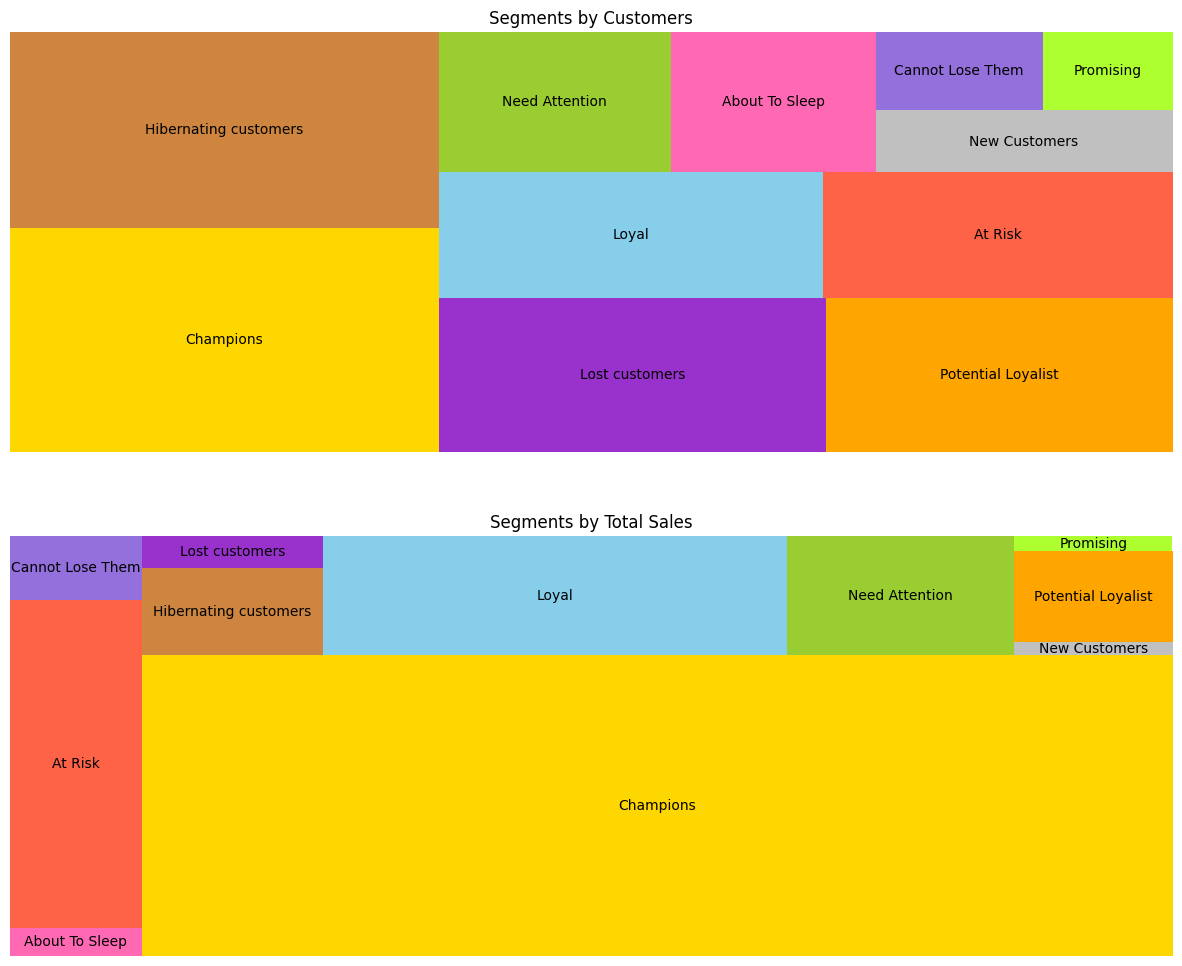

In [ ]:
# Define the colors for each segment
segment_colors = {
    'Champions': '#FFD700',  # Yellow
    'Hibernating customers': '#CD853F',  # Brown
    'Need Attention': '#9ACD32',  # Green
    'About To Sleep': '#FF69B4',  # Pink
    'Cannot Lose Them': '#9370DB',  # Purple
    'Promising': '#ADFF2F',  # Lime
    'New Customers': '#C0C0C0',  # Gray
    'Loyal': '#87CEEB',  # Blue
    'At Risk': '#FF6347',  # Red
    'Potential Loyalist': '#FFA500',  # Orange
    'Lost customers': '#9932CC',  # Dark Purple
}

fig = plt.figure(figsize=(15, 12))

# Create the first subplot for the treemap of segments by customers
ax1 = fig.add_subplot(211)
squarify.plot(sizes=segment_counts, label=segment_counts.index, color=[segment_colors.get(x, 'gray') for x in segment_counts.index], ax=ax1)
ax1.set_title('Segments by Customers')
ax1.axis('off')

# Create the second subplot for the treemap of segments by total sales
ax2 = fig.add_subplot(212)
squarify.plot(sizes=segment_total_sales, label=segment_total_sales.index, color=[segment_colors.get(x, 'gray') for x in segment_total_sales.index], ax=ax2)
ax2.set_title('Segments by Total Sales')
ax2.axis('off')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.2)

plt.show()

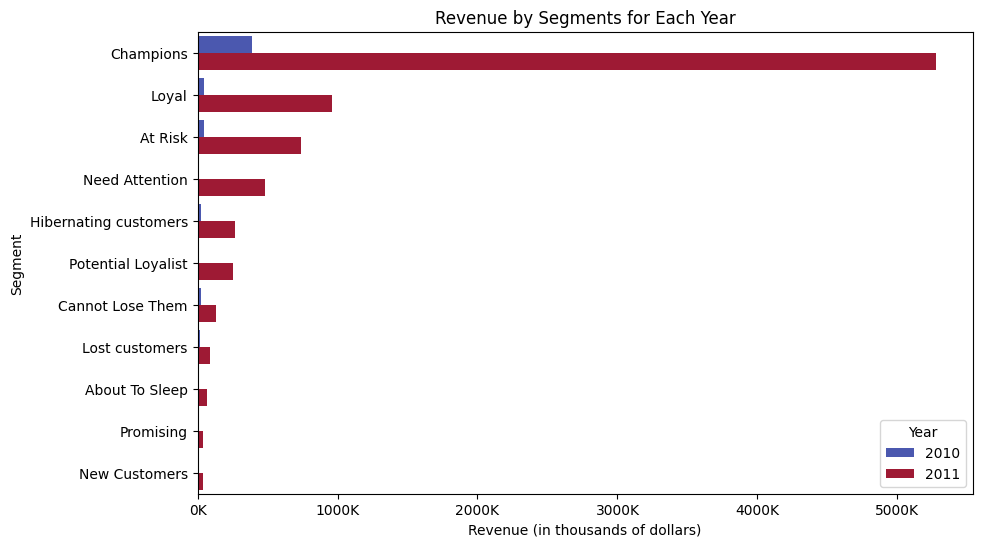

In [ ]:
# Extract the year from the InvoiceDate column
full_df['year'] = full_df['InvoiceDate'].dt.year

# Aggregate revenue by segment and year
segment_year_revenue = full_df.groupby(['segment', 'year'])['total_revenue'].sum().reset_index()

# Calculate the total revenue per segment
segment_revenue = segment_year_revenue.groupby('segment')['total_revenue'].sum().reset_index()

# Sort the DataFrame by total revenue in descending order
segment_revenue = segment_revenue.sort_values('total_revenue', ascending=False)

# Reorder the segments based on the sorted order
segment_year_revenue['segment'] = pd.Categorical(segment_year_revenue['segment'], categories=segment_revenue['segment'], ordered=True)

# Create the subplot grid
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar plot
sns.barplot(data=segment_year_revenue, y='segment', x='total_revenue', hue='year', palette='coolwarm', ax=ax)
plt.xlabel('Revenue (in thousands of dollars)')
plt.ylabel('Segment')
plt.title('Revenue by Segments for Each Year')
plt.legend(title='Year', loc='lower right')

# Format x-axis ticks to display in thousands of dollars
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

plt.show()

At first glance, the segment performance breakdown could be analyzed as follows:

Champions:
- Champions are Superstore's best customers, who bought most recently, most often, and are heavy spenders.
- After a year, the revenue generated from these customers skyrocketted, indicating Superstore's success in taking care of them.
- Dominating in terms of customer quantity and revenue generation.
- Considered as breadwinners for the company.
- High-value and highly engaged customers.
  
Hibernating Customers:

- Substantial customer quantity but generate modest revenue.
- Low engagement and value contribution.
- Hiberanating customers are waking up, potentially on their way transforming into the more preferred segments.

Loyal:

- Dominating segment in terms of customer quantity and revenue generation.
- High-value and highly engaged customers.
- Similar to the Champions, Superstore are giving the loyalists what they really want.

At Risk:
- Considered as breadwinners for the company.
- High customer quantity and revenue generation.
- Substantial revenue generated after a year
- However, there may be some concerns about their future engagement and loyalty.

Need Attention
- Generated great amount of revenue
- With a potential customer base

Potential Loyalists:
- Potential Loyalists are your recent customers with average frequency and who spent a good amount.
- Considered as breadwinners for the company.
- Moderate customer quantity, but they show potential for higher engagement and revenue generation.

Lost Customers:

- Substantial customer quantity but generate insignificant value to the company.
- These are customers who have stopped engaging with the company and may need efforts to regain their interest.

Cannot Lose Them:

- The impact of this segment is equivalent to their numbers.
- High-value customers who are crucial for the company's success.

New and Promising:

- Currently generating subtle impact to the business.
- The number of new customers is moderate, but they have the potential to become more valuable over time.

About To Sleep:

- Substantial customer quantity but generate insignificant value to the company.
- These customers may be at risk of disengagement and require attention to prevent them from becoming lost customers.

Based on this analysis, the company should focus on maximizing the potential of the breadwinners (Champions, At Risk, Loyal, Need Attention, and
Potential Loyalist) while re-engaging with the Hibernating customers and preventing further loss from the Lost Customers segment. Additionally, efforts can be made to nurture the New and Promising segment to increase their impact on the business.

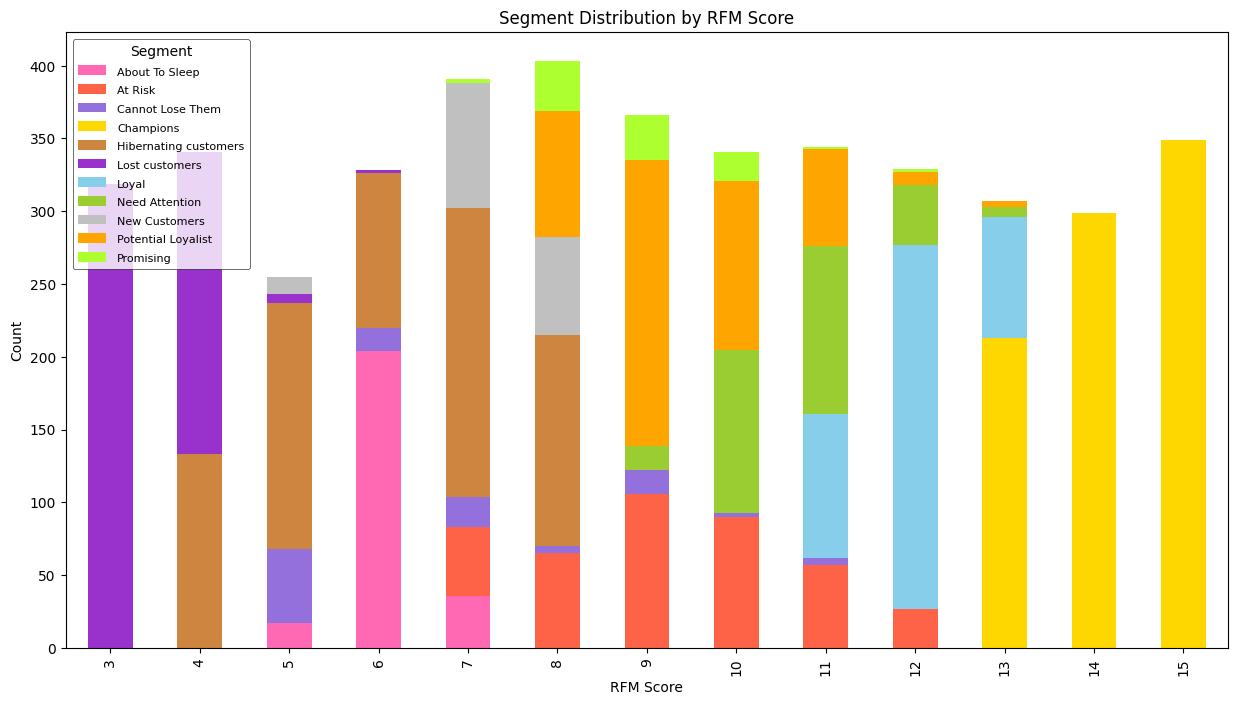

In [ ]:
# Define the segment colors dictionary
segment_colors = {
    'Champions': '#FFD700',  # Yellow
    'Hibernating customers': '#CD853F',  # Brown
    'Need Attention': '#9ACD32',  # Green
    'About To Sleep': '#FF69B4',  # Pink
    'Cannot Lose Them': '#9370DB',  # Purple
    'Promising': '#ADFF2F',  # Lime
    'New Customers': '#C0C0C0',  # Gray
    'Loyal': '#87CEEB',  # Blue
    'At Risk': '#FF6347',  # Red
    'Potential Loyalist': '#FFA500',  # Orange
    'Lost customers': '#9932CC',  # Dark Purple
}

# Count the occurrences of each segment for each rfm_score
segment_counts = subset_df.groupby(['rfm_score', 'segment']).size().unstack().fillna(0)

# Plot the bar plot with custom colors
ax = segment_counts.plot(kind='bar', stacked=True, figsize=(15, 8), color=[segment_colors.get(seg, 'gray') for seg in segment_counts.columns])

plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.title('Segment Distribution by RFM Score')

# Customize the legend
legend = plt.legend(title='Segment', loc='upper left')
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_edgecolor('black')

# Adjust the font size of the legend
for text in legend.get_texts():
    text.set_fontsize(8)

plt.show()

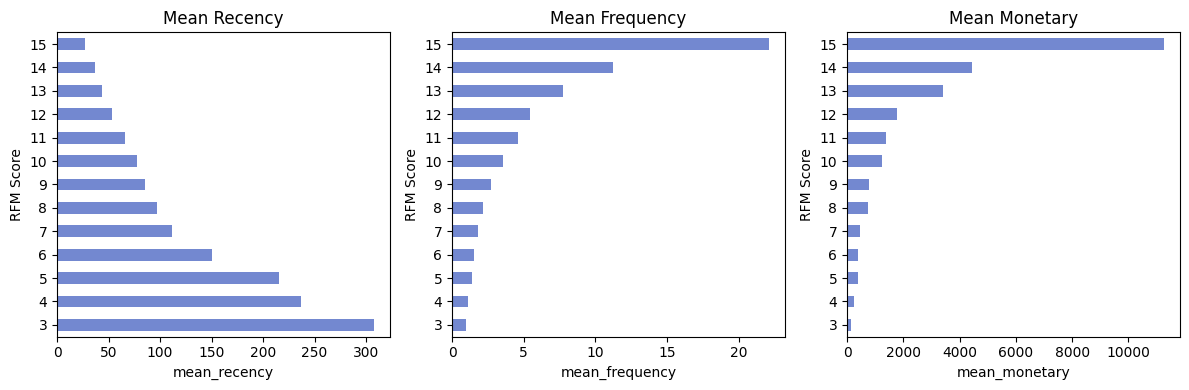

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

metrics = ['mean_recency', 'mean_frequency', 'mean_monetary']
titles = ['Mean Recency', 'Mean Frequency', 'Mean Monetary']

for i, metric in enumerate(metrics):
    ax = axes[i]
    rfm_score_df.plot(kind='barh', x='rfm_score', y=metric, ax=ax, color='#7388D0',legend = False)  # Set the color to blue
    ax.set_xlabel(metric)
    ax.set_ylabel('RFM Score')
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

The column chart above displays the relationship between segments and their corresponding RFM scores. The bar charts illustrate the performance of each score (3 to 15) in terms of recency, frequency, and monetary values.

- Champions: They bought most recently (under 2 months), most often (7-20 times), and are heavy spenders (more than 4000 dollars) (Score 13-15).
- Loyal Customers: They are consistent and frequent shoppers who have made recent purchases and spent a significant amount (Score 11-13).
- Potential Loyalists: They are recent customers (2-4 months) with average frequency (under 10 times) and who spent a good amount (between 1000 to 4000 dollars) (Score 8-13).
- At Risk Customers: They purchased often and spent big amounts but haven't made a purchase recently. Their mean recency ranges from 2 to 4 months (Score 7-12).
- Need Attention Customers: They were once valuable customers but have become less engaged over time. Currently, they are active, purchasing quite frequently, and generating a good amount of revenue (Score 9-13).
- Promising Customers: They show potential for becoming loyal and valuable to Superstore. They have moderate RFM scores, indicating recent engagement (2-4 months ago), average frequency (under 5 times), and a moderate spending amount (under 2000 dollars) (Score 7-10).
- New Customers: Their most recent engagement was roughly 6 months ago. They have a moderate overall RFM score, infrequent purchases (under 5 times), and generate a subtle monetary impact (under 2000 dollars) (Score 5-8).
- Can't Lose Them: They used to visit and purchase quite often but haven't been visiting recently. They share similar traits with current New Customers (Score 5-8).
- Hibernating Customers: They haven't made a purchase recently (more than 6 months ago) and their past purchasing behavior was infrequent with small spending amounts (Score 5-8).
- About to Sleep: They recently made a purchase but haven't been active or frequent shoppers (Score 5-7).
- Lost Customers: They have low recency and frequency scores, indicating they haven't made a purchase in a long time and were infrequent shoppers (Score 1-4).

# Recommendation


#### Champions:
This segment consists of customers who have made recent purchases, are frequent shoppers, and are heavy spenders and they are performing exceptionally well. Prioritizing this segment can have a significant impact on Superstore's revenue during the Christmas season.

- Offer exclusive early access to Christmas sales or promotions, allowing them to shop before the general public.
- Provide them with special discounts or coupons to thank them for their loyalty and encourage them to make additional purchases.
- Consider organizing an exclusive event or VIP shopping experience for Champions, where they can enjoy personalized assistance and special perks.


Doing so can lead to increased spending, repeat purchases, positive word-of-mouth, and potentially attracting new customers who aspire to be part of this esteemed segment. Prioritizing Champions can contribute to driving substantial sales growth and building a strong customer base.


#### Loyal Customers:

This segment has consistent and frequent shoppers who have made recent purchases and spent a significant amount. They are doing thriving, yet not as much as the Champions. Our goal is to convert them gradually into Champions.

Send personalized thank-you notes expressing gratitude for their continued support and loyalty.
Offer them exclusive discounts or rewards as a token of appreciation for their frequent visits and purchases.
Provide recommendations for Christmas gift ideas based on their past purchases, helping them find the perfect gifts for their loved ones.

Doing so can help Superstore:
- Strengthen customer-brand relationships, boosting loyalty and repeat purchases.
- Harness word-of-mouth marketing as loyal customers become brand advocates and share positive experiences.
- Maximize customer lifetime value with ongoing purchases and potential upselling opportunities.
- Foster emotional connections, enhancing the customer experience and brand perception.

#### Potential Loyalists:
By prioritizing potential loyalists, Superstore can increase engagement, convert them into loyal customers, drive revenue growth, boost customer lifetime value, generate positive word-of-mouth, and foster brand loyalty.

To do:
- Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.
- Invite them to join a loyalty program or membership that offers benefits and rewards during the Christmas season.
- Recommend related products or accessories that complement their previous purchases, suggesting they explore additional items.
- Provide personalized product suggestions based on their preferences and buying history, showcasing the variety of Christmas-related products available.

#### At Risk Customers:
Our At Risk customers are generating good revenue, we should not neglect them in this campaign. Prioritizing At Risk customers can prevent revenue loss, retain their business, uncover upselling opportunities, build loyalty, gather valuable insights, and preserve advocacy potential.

To do:

- Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.
- Reconnect with personalized Christmas-themed campaigns, reminding them of their past purchases and the value they received.
- Offer them exclusive discounts or promotions to encourage them to make a Christmas purchase and re-engage with the brand.
- Highlight any improvements, new product lines, or special holiday offers to reignite their interest and show that Superstore is committed to their satisfaction.
#### Need Attention Customers:

Similar to the At Risk customers, Need Attention customers are potential enough for us to invest in. We can:

- Express appreciation for their continued support and recent purchases, thanking them for their loyalty.
- Offer them exclusive promotions or discounts on Christmas-related products to encourage repeat purchases.
- Provide personalized recommendations based on their preferences and past purchases, demonstrating that their needs are understood and catered to.
#### Promising Customers:
We can invest subtly in these customers by:
- Extend a warm thank-you message for their recent engagement and potential as valuable customers.
- Offer them special promotions or discounts on Christmas-related products, encouraging them to explore more and solidify their relationship with the brand.
- Provide personalized product suggestions based on their recent engagement, showcasing relevant Christmas items or limited edition products.
#### New Customers:
These customers are unknown, who might be a Champion customer one day. We should show our hospitality.
- Start building relationships with these customers by providing onboarding support and special Christmas offers to increase their visits.
- Welcome them to Superstore and express gratitude for choosing the brand for their Christmas shopping.
- Offer them a special first-time customer discount or incentive to encourage repeat purchases.
- Provide guidance on Christmas gift ideas or popular products, helping them navigate their holiday shopping experience.
#### Can't Lose Them:
Taking a good look into our history with these customers to gain insights is wise as we don't want other segments' customers to fall into the danger zone. We should:

- Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.
- Re-engage with personalized messages, reminding them of their past frequent visits and purchases.
- Offer them special incentives, such as loyalty rewards or personalized promotions, to encourage them to return and make a Christmas purchase.
- Request feedback or conduct surveys to understand any concerns or issues they might have, and take steps to address them promptly.

For the remaing customers, reactivating them with the following methods is recommended:

#### Hibernating Customers:
- Rekindle their interest with a heartfelt Christmas-themed message, expressing a desire to reconnect.
- Offer them exclusive discounts or incentives to encourage them to make a Christmas purchase and rediscover the brand's offerings.
- Highlight any improvements or new products/services since their last engagement, showcasing the brand's commitment to providing value.
#### About to Sleep:
- Send a gentle reminder of their recent purchase and express appreciation for their support.
- Offer personalized recommendations or suggestions for Christmas gifts or related items based on their previous purchase.
- Highlight any limited-time offers or promotions to motivate them to make additional purchases during the holiday season.
#### Lost Customers:
- Express appreciation for their past support and extend a genuine invitation to reconnect during the Christmas season.
- Offer a special one-time discount or incentive to encourage them to make a comeback.
- Share updates on improvements, new product lines, or customer-centric initiatives to reignite their interest and show that the brand has evolved.

## Abnormal Transactions Analysis

In [ ]:
anomalous_transactions.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice
5,536365,2010-12-01 08:26:00,17850.0,2,7.65
9,536367,2010-12-01 08:34:00,13047.0,32,1.69
16,536367,2010-12-01 08:34:00,13047.0,2,9.95
19,536367,2010-12-01 08:34:00,13047.0,4,7.95
20,536367,2010-12-01 08:34:00,13047.0,4,7.95


In [ ]:
customer_rfm_df.head()

,CustomerID,recency_date,recency,frequency,monetary,r,f,m,rfm_value,rfm_score,segment
0,17850.0,2011-02-10 14:38:00,324,35,5288.63,1,5,5,155,11,Cannot Lose Them
1,13047.0,2011-11-08 12:10:00,53,18,3079.10,4,5,5,455,14,Champions
2,12583.0,2011-12-07 08:07:00,25,18,7187.34,5,5,5,555,15,Champions
3,13748.0,2011-09-05 09:45:00,118,5,948.25,2,4,4,244,10,At Risk
4,15100.0,2011-01-13 17:09:00,352,6,635.10,1,4,3,143,8,At Risk


In [ ]:
anomalous_customers = anomalous_transactions.merge(customer_rfm_df, on='CustomerID', how='inner')


In [ ]:
anomalous_customers.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice,recency_date,recency,frequency,monetary,r,f,m,rfm_value,rfm_score,segment
0,536365,2010-12-01 08:26:00,17850.0,2,7.65,2011-02-10 14:38:00,324,35,5288.63,1,5,5,155,11,Cannot Lose Them
1,536367,2010-12-01 08:34:00,13047.0,32,1.69,2011-11-08 12:10:00,53,18,3079.10,4,5,5,455,14,Champions
2,536367,2010-12-01 08:34:00,13047.0,2,9.95,2011-11-08 12:10:00,53,18,3079.10,4,5,5,455,14,Champions
3,536367,2010-12-01 08:34:00,13047.0,4,7.95,2011-11-08 12:10:00,53,18,3079.10,4,5,5,455,14,Champions
4,536367,2010-12-01 08:34:00,13047.0,4,7.95,2011-11-08 12:10:00,53,18,3079.10,4,5,5,455,14,Champions


<ipython-input-143-ef417aedfac8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='segment', y='customer_count', palette='viridis')


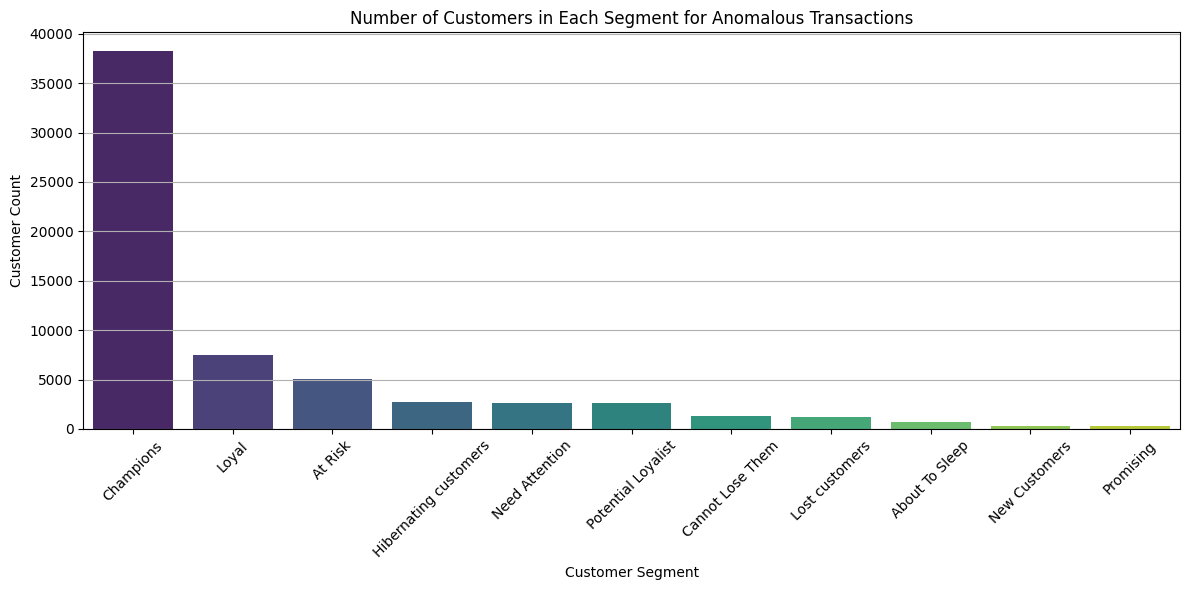

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each segment
segment_counts = anomalous_customers['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'customer_count']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_counts, x='segment', y='customer_count', palette='viridis')
plt.title('Number of Customers in Each Segment for Anomalous Transactions')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
